<a href="https://colab.research.google.com/github/StuBelle/study/blob/main/HMM_%3D_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==在 Colab / Linux 環境安裝 Noto CJK 字體，讓 Matplotlib 可以顯示中文==
!apt-get -qy install fonts-noto-cjk  # 變數說明：apt-get -qy = 靜默模式安裝 fonts-noto-cjk 套件（包含 CJK 字型）
# todo：若不是 Colab 或沒有 sudo 權限，需改用本機字體安裝方式


# ==載入 Matplotlib 核心模組與常用繪圖、字體管理工具==
import matplotlib as mpl  # 變數說明：mpl = Matplotlib 主模組（可用來操作設定與底層行為）
# todo：若後續沒有使用 mpl，可移除避免未使用 import

import matplotlib.pyplot as plt  # 變數說明：plt = Matplotlib 繪圖介面（用 rcParams 設定全域字體）
# todo：若只設定 rcParams 而不畫圖，仍保留 plt 是合理的

import matplotlib.font_manager as fm  # 變數說明：fm = 字體管理工具（可用來查詢系統字體）
# todo：若沒有用到 fm 查詢字體清單，可移除避免未使用 import


# ==清除 Matplotlib 字體快取，強制重新掃描系統新安裝的字體（這一步最關鍵）==
!rm -rf ~/.cache/matplotlib  # 變數說明：刪除 Matplotlib 快取資料夾，避免舊字體列表導致找不到新字體
# todo：如果在非 Linux 環境（例如 Windows），需改用對應快取路徑


# ==設定 Matplotlib 全域預設字體為 Noto Sans CJK JP，讓圖表支援中文顯示==
plt.rcParams['font.family'] = 'Noto Sans CJK JP'  # 變數說明：font.family 指定全域字體家族為 Noto Sans CJK JP（支援 CJK）
# todo：若字體名稱不一致，可用 fm.findSystemFonts() 找到實際字體名稱

plt.rcParams['axes.unicode_minus'] = False  # 變數說明：避免負號顯示成方塊（unicode minus 與某些字體不相容）
# todo：如果仍出現方塊，可改用其他 Noto CJK 字體（例如 Noto Sans CJK TC）


# ==輸出提示訊息，確認字體設定流程已執行==
print("字體設定完成！")  # 變數說明：輸出字串，作為執行成功的提示
# todo：可加上字體檢查，例如 print(plt.rcParams['font.family']) 以確認設定值


Reading package lists...
Building dependency tree...
Reading state information...
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 4s (15.4 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
字體設定完成！


# 資料

In [ ]:
# Google drive掛載
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path

# ==自動判斷執行環境（Colab vs 本機 Windows），並設定波動資料 parquet 資料夾路徑==
colab_vol_dir = Path(r"/content/drive/MyDrive/實驗資料/秒_資料/波動/parquet")  # 變數說明：colab_vol_dir = Colab Google Drive 的 parquet 資料來源路徑
# todo：若 Drive 尚未 mount，colab_vol_dir.exists() 會是 False

# local_vol_dir = Path(r"G:\OneDrive - National Pingtung University\code\data\秒_資料\波動\parquet")  # 變數說明：local_vol_dir = 本機 Windows 的 parquet 資料來源路徑
# local_vol_dir = Path(r"C:\Users\yuki9\OneDrive - National Pingtung University (1)\code\data\秒_資料\波動\parquet")
local_vol_dir = Path(r"C:\Users\user\OneDrive - National Pingtung University\code\data\秒_資料\波動\parquet")

if colab_vol_dir.exists():  # 變數說明：exists() = 檢查該路徑是否實際存在（用來判斷是否在 Colab 且 Drive 可用）
    # ==優先使用 Colab Drive 路徑（最常見於雲端執行）==
    path_vol_dir = colab_vol_dir  # 變數說明：path_vol_dir = 最終使用的 parquet 來源資料夾（指向 Colab 版本）
    # todo：可在此加上提示訊息 print("使用 Colab Drive 路徑")

elif local_vol_dir.exists():  # 變數說明：若 Colab 路徑不存在，則檢查本機 Windows 路徑是否存在
    # ==若在本機執行，則使用 Windows OneDrive 路徑==
    path_vol_dir = local_vol_dir  # 變數說明：path_vol_dir = 最終使用的 parquet 來源資料夾（指向本機版本）
    # todo：可在此加上提示訊息 print("使用本機 Windows 路徑")

else:
    # ==若兩個路徑都不存在，直接拋出錯誤，避免後續讀檔才爆炸==
    raise FileNotFoundError(  # 變數說明：FileNotFoundError = 明確指出資料路徑不存在的例外
        f"找不到波動資料路徑，請確認以下任一資料夾存在：\n"
        f"1) {colab_vol_dir}\n"
        f"2) {local_vol_dir}"
    )

# ===設定輸出資料夾（存放模型結果、圖表、parquet 等輸出）===
OUT = Path("./output_v全域版")  # =
# ===建立輸出資料夾，若已存在則不報錯，並且自動建立父層資料夾===
OUT.mkdir(exist_ok=True, parents=True)
# todo：可加上 print(OUT.resolve()) 確認實際輸出路徑，避免寫到非預期位置


In [3]:
# ==Cell 1: 參數設定 + 工具函數==
import warnings  # 變數說明：Python 警告控制模組
# warnings.filterwarnings("ignore")  # 變數說明：ignore = 關閉所有 warnings（避免 notebook 輸出太吵）
warnings.filterwarnings("ignore", category=FutureWarning)

import gc  # 變數說明：gc = 垃圾回收模組
from datetime import date, datetime  # 變數說明：date/datetime = 日期處理（解析檔名與 log 時間）

import numpy as np
import polars as pl
from sklearn.decomposition import FastICA  # 變數說明：FastICA = ICA 模型（萃取情緒因子）


# ==全域參數設定==
FREQ = "1m"  # 變數說明：FREQ = 聚合頻率（每 1 分鐘 resample 一根）
WINDOW_R = 5  # 變數說明：WINDOW_R = 價格特徵 rolling window（報酬移動統計用）
WINDOW_E = 15  # 變數說明：WINDOW_E = 情緒特徵 rolling window（std 等）
EPSILON = 1e-6  # 變數說明：EPSILON = 防止 log(0) 的極小值


# ==清洗設定==
MIN_VOL_THRESHOLD = 5.0  # 變數說明：MIN_VOL_THRESHOLD = 總量過低視為死魚盤，直接濾掉
MAX_RET_THRESHOLD = 0.1  # 變數說明：MAX_RET_THRESHOLD = 單分鐘報酬超過此值視為異常，直接濾掉


# ==ICA 設定==
ICA_COMPONENTS = 1  # 變數說明：ICA_COMPONENTS = ICA 輸出維度（你目前只取 1 個情緒因子）
ICA_WINDOW_SIZE = 5  # 變數說明：ICA_WINDOW_SIZE = ICA 滾動訓練窗口（過去 5 個交易日）


# ==Logging 工具==
def log(msg):
    print(f"[{datetime.now().strftime('%H:%M:%S')}] 🔹 {msg}")


# ==日期解析工具：判斷近月/遠月標籤==
def get_short_long_labels(fdate):  # 變數說明：fdate = date 物件（交易日）
    """判斷週三與週五結算日的標籤映射"""  # 變數說明：回傳 ("Wed","Fri") 或 ("Fri","Wed")
    wd = fdate.weekday()  # 變數說明：wd = weekday (0=Mon ... 6=Sun)

    if wd in (0, 1):  # 變數說明：週一/週二：近月 Wed、遠月 Fri
        return ("Wed", "Fri")  # 變數說明：return = (short, long)

    if wd in (2, 3):  # 變數說明：週三/週四：週三換倉後近月 Fri、遠月 Wed
        return ("Fri", "Wed")  # 變數說明：return = (short, long)

    if wd == 4:  # 變數說明：週五：近月 Fri、遠月 Wed
        return ("Fri", "Wed")  # 變數說明：return = (short, long)

    raise ValueError(f"非交易日或無法判斷: {fdate} (weekday={wd})")  # 變數說明：週末或不合法日期直接報錯


# ==日期解析工具：從檔名解析交易日==
def parse_date(stem):  # 變數說明：stem = Path(fp).stem（不含副檔名的檔名）
    """
    從檔名解析日期
    修正邏輯：針對 MMDD 格式，若月份 < 9，自動視為 2026 年，否則為 2025 年。
    """  # 變數說明：支援 YYYY-MM-DD / YYYYMMDD / MMDD 三種格式

    try:
        return datetime.strptime(stem, "%Y-%m-%d").date()  # 變數說明：先嘗試直接解析 YYYY-MM-DD
    except ValueError:  # 變數說明：只捕捉日期格式錯誤，不吞掉其他 bug
        pass  # 變數說明：若解析失敗，繼續往下走

    digits = "".join([c for c in stem if c.isdigit()])  # 變數說明：digits = 抽出檔名中所有數字（備用解析用）

    if len(digits) == 8:  # 變數說明：YYYYMMDD
        return date(int(digits[:4]), int(digits[4:6]), int(digits[6:]))  # 變數說明：切片解析年月日

    if len(digits) == 4:  # 變數說明：MMDD（需要判斷年份）
        month = int(digits[:2])  # 變數說明：month = 月份
        day = int(digits[2:])  # 變數說明：day = 日期

        year = 2026 if month < 9 else 2025  # 變數說明：跨年規則：1~8月視為 2026，9~12月視為 2025
        # todo：若資料延伸到 2027，這個規則就要再改成更通用的

        return date(year, month, day)  # 變數說明：回傳 date(year, month, day)

    return None  # 變數說明：解析不到日期就回傳 None（讓上層跳過該檔案）
    # todo：若你希望強制每個檔案都要可解析，可改成 raise


# ==Polars 數值處理工具：安全計算 log return==
def safe_log_diff(col_name):  # 變數說明：col_name = 欄位名稱（例如 Price / Wed_Call）
    """計算 Log Return，並處理 Log(0) 與 Inf 問題"""  # 變數說明：回傳 Polars expression
    return (
        pl.when(pl.col(col_name) <= EPSILON)  # 變數說明：若數值 <= EPSILON（避免 log(0)）
        .then(EPSILON)  # 變數說明：替換成 EPSILON
        .otherwise(pl.col(col_name))  # 變數說明：否則保留原值
        .log()  # 變數說明：取自然對數
        .diff()  # 變數說明：做一階差分 = log return
        .fill_nan(0.0)  # 變數說明：nan 補 0
        .fill_null(0.0)  # 變數說明：null 補 0
    )
    # todo：若你希望保留缺失訊號，可改成不補 0，而是補 null


# ==單日處理函數：讀取並聚合 1 天 parquet==
def process_single_day(fp):  # 變數說明：fp = parquet 檔案 Path
    """讀取並處理單日 Parquet 檔案"""  # 變數說明：輸出 Polars DataFrame 或 None
    try:
        fdate = parse_date(fp.stem)  # 變數說明：fdate = 從檔名解析出的交易日期
        if fdate is None:  # 變數說明：若檔名無法解析日期
            return None  # 變數說明：跳過該檔案
            # todo：可加 log 提醒哪些檔名解析不到日期

        df_vol = pl.read_parquet(fp)  # 變數說明：df_vol = 單日原始秒資料（含波動與成交量）
        # todo：若檔案很大，可改成 scan_parquet + lazy pipeline

        if "時間" in df_vol.columns:  # 變數說明：處理中文欄位名稱
            df_vol = df_vol.rename({"時間": "SnapshotTime"})  # 變數說明：統一時間欄位為 SnapshotTime
            # todo：若你還有其他中文欄位，也可以統一 rename

        # ==檢查必要欄位是否存在==
        required_cols = [  # 變數說明：required_cols = 必要欄位清單
            "SnapshotTime",  # 變數說明：時間欄位
            "現貨",  # 變數說明：現貨價格
            "Wed_Call波動",  # 變數說明：週三 Call 波動
            "Wed_Put波動",  # 變數說明：週三 Put 波動
            "Fri_Call波動",  # 變數說明：週五 Call 波動
            "Fri_Put波動",  # 變數說明：週五 Put 波動
            "權值股_總瞬間量",  # 變數說明：總量
            "權值股_買進",  # 變數說明：買進金額
            "權值股_賣出",  # 變數說明：賣出金額
        ]


        if not all(col in df_vol.columns for col in required_cols):  # 檢查 required_cols 是否都存在
            return None  # 欄位不完整則跳過


        # ==聚合為 1 分鐘 K 棒（Resample）==
        q = (  # 變數說明：q = LazyFrame pipeline（提高效能）
            df_vol.lazy()  # 變數說明：lazy = 延遲執行
            .group_by_dynamic("SnapshotTime", every=FREQ)  # 變數說明：每 FREQ 分鐘聚合
            .agg([  # 變數說明：聚合規則
                pl.col("現貨").last().alias("Price"),  # 變數說明：Price = 每分鐘最後一筆現貨價格
                pl.col("Wed_Call波動").last().alias("Wed_Call"),  # 變數說明：Wed_Call = 每分鐘最後一筆週三 Call 波動
                pl.col("Wed_Put波動").last().alias("Wed_Put"),  # 變數說明：Wed_Put = 每分鐘最後一筆週三 Put 波動
                pl.col("Fri_Call波動").last().alias("Fri_Call"),  # 變數說明：Fri_Call = 每分鐘最後一筆週五 Call 波動
                pl.col("Fri_Put波動").last().alias("Fri_Put"),  # 變數說明：Fri_Put = 每分鐘最後一筆週五 Put 波動
                pl.col("權值股_總瞬間量").sum().alias("Vol_Total"),  # 變數說明：Vol_Total = 每分鐘權值股總量
                pl.col("權值股_買進").sum().alias("Vol_Buy"),  # 變數說明：Vol_Buy = 每分鐘買進量金額
                pl.col("權值股_賣出").sum().alias("Vol_Sell"),  # 變數說明：Vol_Sell = 每分鐘賣出量金額
            ])
            .filter(  #只保留交易時間
                (pl.col("SnapshotTime").dt.time() >= pl.time(8, 45))  # 起始 08:45
                & (pl.col("SnapshotTime").dt.time() <= pl.time(13, 45))  # 結束 13:45
            )
        )

        df_agg = q.collect()  # 變數說明：collect = 實際執行 lazy pipeline 得到 DataFrame
        if df_agg.is_empty():  # 若當天沒有有效資料
            return None  # 跳過
            # todo：可加 log 看哪些日期沒資料

        # ==取得期權標籤（近月/遠月）==
        try:
            short, long = get_short_long_labels(fdate)  # 變數說明：short/long = ("Wed","Fri") 或 ("Fri","Wed")
        except ValueError:
            return None  # 非交易日則跳過
            # todo：若你想保留非交易日資料，可改成 fallback

        def vc(day, cp):  # 變數說明：day = Wed/Fri, cp = Call/Put
            return f"{day}_{cp}"  # 回傳欄位名稱（對應後面要用的欄位）
            # todo：若你未來加入更多合約，可改成 dict mapping

        # ==計算報酬與波動情緒差分==
        df_agg = df_agg.with_columns([  # 變數說明：新增特徵欄位
            safe_log_diff("Price").alias("Ret_t"),  # Ret_t = 現貨 log return
            safe_log_diff(vc(short, "Call")).alias("Emo_Short_Call_diff"),  # 近月 Call 波動 log diff
            safe_log_diff(vc(short, "Put")).alias("Emo_Short_Put_diff"),  # 近月 Put 波動 log diff
            safe_log_diff(vc(long, "Call")).alias("Emo_Long_Call_diff"),  # 遠月 Call 波動 log diff
            safe_log_diff(vc(long, "Put")).alias("Emo_Long_Put_diff"),  # 遠月 Put 波動 log diff
            pl.lit(fdate).alias("date_group"),  # date_group = 交易日分組欄位
        ])
        # todo：若你想要 session-based 特徵，可以加上分鐘索引欄位

        keep_cols = [  # 最終保留欄位
            "SnapshotTime", "date_group", "Price",
            "Vol_Total", "Vol_Buy", "Vol_Sell",
            "Ret_t",
            "Emo_Short_Call_diff", "Emo_Short_Put_diff",
            "Emo_Long_Call_diff", "Emo_Long_Put_diff",
        ]

        return df_agg.select([c for c in keep_cols if c in df_agg.columns])  # 變數說明：回傳整理後的單日 DataFrame


    except Exception as e:  # 捕捉所有錯誤避免整批處理中斷
        log(f"處理檔案 {fp.name} 時發生錯誤: {e}")  # 變數說明：輸出錯誤訊息
        return None  # 出錯則跳過該檔案
        # todo：可把錯誤檔案名寫入 log 檔方便回溯


# ==Cell 2: 特徵工程函數==
def perform_feature_engineering(df):  # 合併後的全資料（多日）
    """
    分階段構建特徵工程：
    1️⃣ 資金動向 (Buy_pressure_t)
    2️⃣ 滾動 ICA 情緒因子
    3️⃣ 價格特徵
    """
    log("開始執行特徵工程...")

    # ==1️⃣ 資金動向==
    log("執行 1️⃣ 資金動向特徵...")

    df = df.sort(["date_group", "SnapshotTime"])  # 確保每個交易日內時間排序
    df = df.filter(  #清洗條件（死魚盤 + 異常波動）
        (pl.col("Vol_Total") >= MIN_VOL_THRESHOLD)  # 總量必須 >= MIN_VOL_THRESHOLD
        & (pl.col("Ret_t").abs() <= MAX_RET_THRESHOLD)  # 報酬絕對值 <= MAX_RET_THRESHOLD
    )


    df = df.with_columns([  # 新增 Buy_pressure_t
        (
            (pl.col("Vol_Buy") - pl.col("Vol_Sell"))  # 買賣差
            / (pl.col("Vol_Buy") + pl.col("Vol_Sell") + 1)  # 分母加 1 避免除以 0
        ).alias("Buy_pressure_t")  # Buy_pressure_t = 資金動向（-1~1）
    ])

    df = df.with_columns([  # 雙重平滑（代表更長期意圖）
        pl.col("Buy_pressure_t")  # 原始買壓指標
        .ewm_mean(span=30, adjust=False)  # 第一次 EWM 平滑（30m）
        .alias("Buy_pressure_trend_30m"),  # 變數說明：Buy_pressure_trend_30m = 長期買壓趨勢（30m）

        pl.col("Buy_pressure_t")  # 原始買壓指標
        .ewm_mean(span=60, adjust=False)  # 第一次 EWM 平滑（60m）
        .alias("Buy_pressure_trend_60m"),  # Buy_pressure_trend_60m = 更長期買壓趨勢（60m）
    ])


    # ==2️⃣ 滾動 ICA 情緒因子==
    log("執行 2️⃣ 滾動 ICA（情緒因子萃取）")

    emo_cols = [  # 變數說明：emo_cols = ICA 的輸入欄位（四個波動差分）
        "Emo_Short_Call_diff",
        "Emo_Short_Put_diff",
        "Emo_Long_Call_diff",
        "Emo_Long_Put_diff",
    ]

    unique_dates = sorted(df["date_group"].unique().to_list())  # 變數說明：unique_dates = 交易日清單（排序後）
    df = df.with_columns(pl.lit(0.0).alias("Emo_score"))  # 變數說明：先建立預設 Emo_score（避免 ICA 失敗時缺欄）
    # todo：如果你想追蹤 ICA 失敗比例，可加一個 Emo_valid flag

    results = []  # 變數說明：results = 每日計算後的 DataFrame list（最後 concat）
    # todo：若資料天數很大，list 會吃記憶體，可改成分批寫出

    for i, d in enumerate(unique_dates):  # 變數說明：i = 日期索引，d = 當前交易日
        train_dates = unique_dates[max(0, i - ICA_WINDOW_SIZE): i + 1]  # 變數說明：訓練日期範圍（過去 N 天 + 當天）
        # todo：若你想避免 look-ahead bias，應該排除當天（只用過去天）

        df_train = df.filter(pl.col("date_group").is_in(train_dates))  # 變數說明：df_train = ICA 訓練資料
        df_cur = df.filter(pl.col("date_group") == d)  # 變數說明：df_cur = 當日資料（要 transform）

        X_train = df_train.select(emo_cols).fill_null(0).fill_nan(0).to_numpy()  # 變數說明：X_train = ICA 訓練矩陣
        X_cur = df_cur.select(emo_cols).fill_null(0).fill_nan(0).to_numpy()  # 變數說明：X_cur = 當日矩陣

        if X_train.shape[0] > 50:  # 變數說明：避免樣本太少導致 ICA 不穩
            try:
                ica = FastICA(  # 變數說明：建立 ICA 模型
                    n_components=ICA_COMPONENTS,  # 變數說明：輸出維度（1）
                    random_state=42,  # 變數說明：固定隨機種子（確保可重現）
                    max_iter=1000,  # 變數說明：最大迭代次數（避免不收斂）
                )
                # todo：若常出現 ConvergenceWarning，可調整 tol 或 whiten 參數

                ica.fit(X_train)  # 變數說明：用過去窗口資料 fit ICA
                emo = ica.transform(X_cur).ravel()  # 變數說明：emo = 當日每分鐘的 ICA 1D 分數

                ret_arr = df_cur["Ret_t"].to_numpy()  # 變數說明：ret_arr = 當日報酬率，用來做方向校準

                if len(emo) > 1 and not np.all(np.isnan(ret_arr)):  # 變數說明：確保可計算 corr
                    corr = np.corrcoef(emo, ret_arr)[0, 1]  # 變數說明：corr = 情緒分數與報酬率的相關係數
                    # todo：若你想更穩健，可改 Spearman 或 rolling corr

                    if not np.isnan(corr) and corr < 0:  # 變數說明：若相關性為負
                        emo = -emo  # 變數說明：翻轉方向，讓 Emo_score 越大越偏多

                df_cur = df_cur.with_columns(pl.Series("Emo_score", emo))  # 變數說明：把 emo 寫回當日 DataFrame

            except Exception as e:  # 變數說明：ICA 可能因矩陣問題或收斂失敗
                log(f"  ⚠️  日期 {d} ICA 計算失敗，保留預設值：{e}")  # 變數說明：顯示警告
                # todo：可把失敗日期記錄到 list，最後輸出

        results.append(df_cur)  # 變數說明：把當日結果加入 results

    df = pl.concat(results)  # 變數說明：把每日結果合併回完整資料
    # todo：若結果順序錯亂，可再 sort 一次 date_group + SnapshotTime


    # ==情緒次級特徵==
    df = df.with_columns([  # 變數說明：從 Emo_score 延伸更多特徵
        pl.col("Emo_score").diff().fill_null(0).alias("Emo_score_delta"),  # 變數說明：情緒變化量
        pl.col("Emo_score").rolling_std(WINDOW_E, min_periods=1).alias("Emo_score_15std"),  # 變數說明：情緒波動度
        pl.col("Emo_score").shift(1).alias("Emo_score_lag1"),  # 變數說明：前一分鐘情緒
    ])
    # todo：若你要做 HMM，lag1 和 delta 通常很有用


    # ==3️⃣ 價格特徵==
    log("執行 3️⃣ 價格特徵...")  # 變數說明：提示目前階段

    df = df.with_columns([  # 變數說明：價格/報酬延伸特徵
        pl.col("Ret_t").rolling_mean(WINDOW_R, min_periods=1).alias("Ret_ma_5m"),  # 變數說明：5 分鐘平均報酬
        pl.col("Ret_t").rolling_std(WINDOW_R, min_periods=1).alias("Ret_std_5m"),  # 變數說明：5 分鐘報酬波動度
        pl.col("Ret_t").shift(1).fill_null(0).alias("Ret_lag1"),  # 變數說明：前一分鐘報酬
    ])
    # todo：若你要做 regime 模型，可再加 rolling sum 或 zscore

    gc.collect()  # 變數說明：強制垃圾回收，釋放 ICA 訓練中產生的中間物件
    # todo：gc.collect() 不一定需要，但在 Colab 大資料通常有幫助

    log("✔ 核心變數建構完成（無雜訊指標）")  # 變數說明：提示完成
    return df  # 變數說明：回傳最終特徵資料


# ==Cell 3: 資料讀取 + 特徵工程執行==
if __name__ == "__main__":  # 變數說明：只在 script 執行時跑（notebook 可直接跑也會成立）
    log(f"資料來源路徑：{path_vol_dir}")  # 變數說明：輸出目前讀取的資料夾路徑

    if not path_vol_dir.exists():  # 變數說明：檢查資料來源路徑是否存在
        log("❌ 路徑不存在，請修改 path_vol_dir")  # 變數說明：輸出錯誤提示
        raise FileNotFoundError(path_vol_dir)  # 變數說明：直接中止，避免後續全空
        # todo：若你希望 notebook 不中斷，可改成 return

    log("=" * 60)  # 變數說明：輸出分隔線
    log("【步驟 1】讀取原始資料...")  # 變數說明：提示目前步驟
    log("=" * 60)  # 變數說明：輸出分隔線

    files = sorted(path_vol_dir.glob("*.parquet"))  # 變數說明：files = parquet 檔案列表（排序）
    log(f"✔ 發現 {len(files)} 個檔案，準備處理...")  # 變數說明：輸出檔案數量

    if len(files) == 0:  # 變數說明：如果資料夾內沒有 parquet
        log("❌ 錯誤：資料夾內沒有任何 parquet 檔案")  # 變數說明：輸出錯誤提示
        raise FileNotFoundError(f"找不到 parquet: {path_vol_dir}")  # 變數說明：中止流程
        # todo：若你有其他副檔名，可擴充 glob

    df_list = []  # 變數說明：df_list = 儲存每日 DataFrame 的 list（最後 concat）

    for i, fp in enumerate(files):  # 變數說明：i = index, fp = parquet 檔案 Path
        df_day = process_single_day(fp)  # 變數說明：df_day = 單日處理結果（或 None）

        if df_day is not None:  # 變數說明：只保留成功處理的資料
            cols_to_cast = [  # 變數說明：cols_to_cast = 要轉 float 的欄位（排除日期與時間）
                c for c in df_day.columns
                if c not in ["date_group", "SnapshotTime"]
            ]
            # todo：若你想節省記憶體，可用 Float32

            df_day = df_day.with_columns([  # 變數說明：把數值欄位統一轉成 Float64
                pl.col(c).cast(pl.Float64) for c in cols_to_cast  # 變數說明：逐欄位 cast
            ])

            df_list.append(df_day)  # 變數說明：加入 list 等待後續 concat

        if (i + 1) % 50 == 0:  # 變數說明：每 50 個檔案輸出一次進度
            log(f"  已處理 {i + 1}/{len(files)} 個檔案...")  # 變數說明：進度提示

    log("=" * 60)  # 變數說明：輸出分隔線
    log("【步驟 2】合併資料...")  # 變數說明：提示目前步驟
    log("=" * 60)  # 變數說明：輸出分隔線

    if df_list:  # 變數說明：若有至少一個成功日資料
        df_all = pl.concat(df_list, how="vertical_relaxed")  # 變數說明：df_all = 合併後完整資料
        del df_list  # 變數說明：刪除 list 釋放記憶體
        gc.collect()  # 變數說明：強制垃圾回收

        log(f"✔ 合併後原始筆數：{df_all.height:,}")  # 變數說明：顯示合併後筆數
        log(f"✔ 時間範圍：{df_all['SnapshotTime'].min()} ~ {df_all['SnapshotTime'].max()}")  # 變數說明：顯示時間範圍
        log(f"✔ 交易日期數：{df_all['date_group'].n_unique()}")  # 變數說明：顯示交易日數

        log("=" * 60)  # 變數說明：輸出分隔線
        log("【步驟 3】執行特徵工程...")  # 變數說明：提示目前步驟
        log("=" * 60)  # 變數說明：輸出分隔線

        df_final = perform_feature_engineering(df_all)  # 變數說明：df_final = 最終特徵資料

        log(f"✔ 清洗與處理後最終筆數：{df_final.height:,}")  # 變數說明：顯示最終筆數

        log("=" * 60)  # 變數說明：輸出分隔線
        log("【步驟 4】資料檢查...")  # 變數說明：提示目前步驟
        log("=" * 60)  # 變數說明：輸出分隔線

        log(f"✔ 最終欄位數：{len(df_final.columns)}")  # 變數說明：顯示欄位數
        log(f"✔ 欄位列表：{df_final.columns}")  # 變數說明：顯示欄位名稱清單

        missing_counts = df_final.null_count()  # 變數說明：missing_counts = 每欄位 null 數量統計
        total_nulls = missing_counts.sum_horizontal()[0]  # 變數說明：total_nulls = 全欄位 null 總和

        if total_nulls > 0:  # 變數說明：若存在缺失值
            log("⚠️  發現缺失值：")  # 變數說明：輸出警告
            missing_dict = missing_counts.to_dict(as_series=False)  # 變數說明：轉成 dict 方便逐欄位印出

            for col, count in missing_dict.items():  # 變數說明：逐欄位檢查缺失數
                if count[0] > 0:  # 變數說明：若該欄位缺失 > 0
                    log(f"    - {col}: {count[0]} 筆")  # 變數說明：輸出欄位缺失數
        else:
            log("✔ 無缺失值")  # 變數說明：確認資料完整

        log("=" * 60)  # 變數說明：輸出分隔線
        log("【步驟 5】輸出結果...")  # 變數說明：提示目前步驟
        log("=" * 60)  # 變數說明：輸出分隔線

        out_file = OUT / "step1_features_optimized.parquet"  # 變數說明：out_file = 輸出 parquet 檔案路徑
        df_final.write_parquet(out_file)  # 變數說明：把 df_final 寫成 parquet
        log(f"✅ 檔案已輸出至：{out_file}")  # 變數說明：輸出檔案位置

        log("\n【資料統計摘要】")  # 變數說明：輸出摘要標題
        log(f"  - 總筆數：{df_final.height:,}")  # 變數說明：顯示總筆數
        log(f"  - 交易日數：{df_final['date_group'].n_unique()}")  # 變數說明：顯示交易日數
        log(f"  - 時間跨度：{df_final['SnapshotTime'].min()} ~ {df_final['SnapshotTime'].max()}")  # 變數說明：顯示時間跨度

        numeric_cols = [c for c in df_final.columns if c not in ["date_group", "SnapshotTime"]]  # 變數說明：numeric_cols = 數值欄位清單
        stats = df_final.select(numeric_cols).describe()  # 變數說明：stats = Polars describe 統計表

        log("\n【關鍵欄位統計】")  # 變數說明：輸出標題
        print(stats)  # 變數說明：顯示 describe 結果（包含 mean/std/min/max）

    else:
        log("❌ 錯誤：未讀取到任何有效資料。")  # 變數說明：若 df_list 為空
        log("   請檢查：")  # 變數說明：提示排查方向
        log("   1. 資料路徑是否正確")  # 變數說明：排查項目 1
        log("   2. Parquet 檔案是否損毀")  # 變數說明：排查項目 2
        log("   3. 必要欄位是否存在")  # 變數說明：排查項目 3
        # todo：可加上統計：成功處理檔案數 / 跳過檔案數


[11:06:15] 🔹 資料來源路徑：C:\Users\user\OneDrive - National Pingtung University\code\data\秒_資料\波動\parquet
[11:06:15] 🔹 ============================================================
[11:06:15] 🔹 【步驟 1】讀取原始資料...
[11:06:15] 🔹 ============================================================
[11:06:15] 🔹 ✔ 發現 86 個檔案，準備處理...
[11:06:16] 🔹   已處理 50/86 個檔案...
[11:06:17] 🔹 ============================================================
[11:06:17] 🔹 【步驟 2】合併資料...
[11:06:17] 🔹 ============================================================
[11:06:17] 🔹 ✔ 合併後原始筆數：24,347
[11:06:17] 🔹 ✔ 時間範圍：2025-09-05 08:45:00 ~ 2026-01-21 13:45:00
[11:06:17] 🔹 ✔ 交易日期數：86
[11:06:17] 🔹 ============================================================
[11:06:17] 🔹 【步驟 3】執行特徵工程...
[11:06:17] 🔹 ============================================================
[11:06:17] 🔹 開始執行特徵工程...
[11:06:17] 🔹 執行 1️⃣ 資金動向特徵...
[11:06:17] 🔹 執行 2️⃣ 滾動 ICA（情緒因子萃取）
[11:06:17] 🔹 執行 3️⃣ 價格特徵...
[11:06:17] 🔹 ✔ 核心變數建構完成（無雜訊指標）
[11:06:17] 🔹 ✔ 清洗與處理後最終筆數：20,606
[11:06:1

C:\Users\user\AppData\Local\Temp\ipykernel_37364\998437838.py:297: DeprecationWarning: the argument `min_periods` for `Expr.rolling_std` is deprecated. It was renamed to `min_samples` in version 1.21.0.
  pl.col("Emo_score").rolling_std(WINDOW_E, min_periods=1).alias("Emo_score_15std"),  # 變數說明：情緒波動度
C:\Users\user\AppData\Local\Temp\ipykernel_37364\998437838.py:307: DeprecationWarning: the argument `min_periods` for `Expr.rolling_mean` is deprecated. It was renamed to `min_samples` in version 1.21.0.
  pl.col("Ret_t").rolling_mean(WINDOW_R, min_periods=1).alias("Ret_ma_5m"),  # 變數說明：5 分鐘平均報酬
C:\Users\user\AppData\Local\Temp\ipykernel_37364\998437838.py:308: DeprecationWarning: the argument `min_periods` for `Expr.rolling_std` is deprecated. It was renamed to `min_samples` in version 1.21.0.
  pl.col("Ret_t").rolling_std(WINDOW_R, min_periods=1).alias("Ret_std_5m"),  # 變數說明：5 分鐘報酬波動度


In [4]:
# @title
# ============================================================
# Cell 4: 特徵標準化 (RobustScaler with 5-Day Rolling Window)
# ============================================================

from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

log("=" * 60)
log("【步驟 6】特徵標準化（RobustScaler with 5-Day Rolling Window）...")
log("=" * 60)

# 讀取之前輸出的特徵檔案
out_file = OUT / "step1_features_optimized.parquet"
df_final = pl.read_parquet(out_file)

# 定義需要標準化的欄位（排除時間和分組欄位）
exclude_cols = ["SnapshotTime", "date_group"]
feature_cols = [c for c in df_final.columns if c not in exclude_cols]

log(f"✔ 讀取特徵資料：{out_file}")
log(f"✔ 待標準化欄位數：{len(feature_cols)}")
log(f"✔ 欄位列表：{feature_cols}")

# 初始化標準化欄位
df_scaled = df_final.with_columns([
    pl.lit(None).cast(pl.Float64).alias(f"{c}_scaled")
    for c in feature_cols
])

# 取得所有唯一日期並排序
unique_dates = sorted(df_final["date_group"].unique().to_list())
log(f"✔ 總交易日數：{len(unique_dates)}")

# ==========================================================
# 執行滾動窗口標準化 (5-Day Rolling Window)
# ==========================================================
log("\n開始執行 5 日滾動窗口標準化...")

results = []
window_size = 5

for i, current_date in enumerate(unique_dates):
    # 構建訓練窗口：過去 5 天 + 當前日期
    train_start_idx = max(0, i - window_size + 1)
    train_dates = unique_dates[train_start_idx : i + 1]

    # 取得訓練資料（用於計算 scaler 的 median 和 IQR）
    df_train = df_final.filter(pl.col("date_group").is_in(train_dates))

    # 取得當前日期資料（待標準化）
    df_current = df_final.filter(pl.col("date_group") == current_date)

    # 提取特徵矩陣
    X_train = df_train.select(feature_cols).fill_null(0.0).to_numpy()
    X_current = df_current.select(feature_cols).fill_null(0.0).to_numpy()

    # 訓練 RobustScaler（基於訓練窗口）
    scaler = RobustScaler(quantile_range=(25.0, 75.0))
    scaler.fit(X_train)

    # 標準化當前日期數據
    X_scaled = scaler.transform(X_current)

    # 將標準化後的數據併回到當前日期 DataFrame
    df_current_scaled = df_current.clone()
    for j, col in enumerate(feature_cols):
        df_current_scaled = df_current_scaled.with_columns(
            pl.Series(f"{col}_scaled", X_scaled[:, j])
        )

    results.append(df_current_scaled)

    if (i + 1) % 10 == 0 or i == 0:
        log(f"  ✔ 已處理 {i + 1}/{len(unique_dates)} 天（訓練窗口：{len(train_dates)} 天）")

# 合併所有標準化結果
df_scaled_final = pl.concat(results)

log("\n✔ 滾動窗口標準化完成")

# ==========================================================
# 驗證標準化結果
# ==========================================================
log("\n" + "=" * 60)
log("【驗證標準化結果】")
log("=" * 60)

# 選擇幾個關鍵欄位進行驗證
check_cols = ["Price", "Ret_t", "Buy_pressure_t", "Emo_score"]
check_scaled_cols = [f"{c}_scaled" for c in check_cols]

log("\n原始特徵統計：")
stats_original = df_final.select(check_cols).describe()
print(stats_original)

log("\n標準化特徵統計：")
stats_scaled = df_scaled_final.select(check_scaled_cols).describe()
print(stats_scaled)

# ==========================================================
# 保留原始欄位 + 添加標準化欄位
# ==========================================================
log("\n" + "=" * 60)
log("【輸出最終資料集】")
log("=" * 60)

# 最終資料集：保留原始欄位 + 所有標準化欄位
scaled_feature_cols = [f"{c}_scaled" for c in feature_cols]
final_cols = exclude_cols + feature_cols + scaled_feature_cols

df_final_output = df_scaled_final.select(final_cols)

log(f"✔ 最終資料集欄位數：{len(df_final_output.columns)}")
log(f"✔ 原始欄位：{len(exclude_cols) + len(feature_cols)}")
log(f"✔ 標準化欄位：{len(scaled_feature_cols)}")
log(f"✔ 總筆數：{df_final_output.height:,}")

# 輸出檔案
out_scaled_file = OUT / "step2_features_scaled.parquet"
df_final_output.write_parquet(out_scaled_file)

log(f"\n✅ 標準化資料已輸出至：{out_scaled_file}")

# 輸出欄位列表
log("\n【最終欄位列表】")
log("原始 + 標準化欄位：")
for col in df_final_output.columns:
    log(f"  - {col}")

log("\n✔ 特徵標準化流程完成！")

[11:06:30] 🔹 ============================================================
[11:06:30] 🔹 【步驟 6】特徵標準化（RobustScaler with 5-Day Rolling Window）...
[11:06:30] 🔹 ============================================================
[11:06:30] 🔹 ✔ 讀取特徵資料：output_v全域版\step1_features_optimized.parquet
[11:06:30] 🔹 ✔ 待標準化欄位數：19
[11:06:30] 🔹 ✔ 欄位列表：['Price', 'Vol_Total', 'Vol_Buy', 'Vol_Sell', 'Ret_t', 'Emo_Short_Call_diff', 'Emo_Short_Put_diff', 'Emo_Long_Call_diff', 'Emo_Long_Put_diff', 'Buy_pressure_t', 'Buy_pressure_trend_30m', 'Buy_pressure_trend_60m', 'Emo_score', 'Emo_score_delta', 'Emo_score_15std', 'Emo_score_lag1', 'Ret_ma_5m', 'Ret_std_5m', 'Ret_lag1']
[11:06:30] 🔹 ✔ 總交易日數：83
[11:06:30] 🔹 
開始執行 5 日滾動窗口標準化...
[11:06:30] 🔹   ✔ 已處理 1/83 天（訓練窗口：1 天）
[11:06:30] 🔹   ✔ 已處理 10/83 天（訓練窗口：5 天）
[11:06:30] 🔹   ✔ 已處理 20/83 天（訓練窗口：5 天）
[11:06:30] 🔹   ✔ 已處理 30/83 天（訓練窗口：5 天）
[11:06:30] 🔹   ✔ 已處理 40/83 天（訓練窗口：5 天）
[11:06:30] 🔹   ✔ 已處理 50/83 天（訓練窗口：5 天）
[11:06:30] 🔹   ✔ 已處理 60/83 天（訓練窗口：5 天）
[11:06:30] 🔹   ✔ 已處理 

In [5]:
# @title
# ============================================================
# Cell 5: PCA 降維分析 (全欄位整合)
# ============================================================

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

log("=" * 60)
log("【步驟 7】PCA 降維分析（全欄位整合）...")
log("=" * 60)

# 讀取標準化後的資料
out_scaled_file = OUT / "step2_features_scaled.parquet"
df_pca = pl.read_parquet(out_scaled_file)

log(f"✔ 讀取標準化資料：{out_scaled_file}")

# ==========================================================
# 1️⃣ 選擇所有標準化欄位進行 PCA
# ==========================================================
log("\n【特徵選擇】")

# 排除時間和分組欄位，選擇所有標準化欄位
exclude_cols = ["SnapshotTime", "date_group"]
all_feature_cols = [c for c in df_pca.columns if c not in exclude_cols]

# 篩選標準化後的欄位（_scaled 結尾）
all_scaled = [c for c in all_feature_cols if c.endswith("_scaled")]
pca_input_cols= all_scaled[9:15]

log(f"✔ 參與 PCA 的標準化欄位數：{len(pca_input_cols)}")
log(f"✔ 欄位列表：")
for i, col in enumerate(pca_input_cols, 1):
    log(f"   {i}. {col}")

# 提取特徵矩陣
X_pca_input = df_pca.select(pca_input_cols).fill_null(0.0).to_numpy()

log(f"✔ 特徵矩陣形狀：{X_pca_input.shape[0]} x {X_pca_input.shape[1]}")

# ==========================================================
# 2️⃣ 執行 PCA（保留所有主成分）
# ==========================================================
log("\n【執行 PCA】")

n_components_max = min(X_pca_input.shape[1], X_pca_input.shape[0])
pca_full = PCA(n_components=n_components_max)
X_pca_transformed = pca_full.fit_transform(X_pca_input)

explained_var = pca_full.explained_variance_ratio_
cumsum_var = np.cumsum(explained_var)

log(f"✔ 成功執行 PCA，共 {len(explained_var)} 個主成分")

# 顯示前 15 個主成分的解釋方差
log(f"\n主成分解釋方差比例（前 15 個）：")
for i in range(min(15, len(explained_var))):
    log(f"  PC{i+1}: {explained_var[i]*100:6.2f}% | 累積：{cumsum_var[i]*100:6.2f}%")

if len(explained_var) > 15:
    log(f"  ... (共 {len(explained_var)} 個主成分)")

# ==========================================================
# 3️⃣ 確定保留的主成分數
# ==========================================================
log("\n【確定保留的主成分數】")

# 尋找達到 85% 累積解釋方差的主成分數
n_components_85 = np.argmax(cumsum_var >= 0.85) + 1
n_components_90 = np.argmax(cumsum_var >= 0.90) + 1
n_components_95 = np.argmax(cumsum_var >= 0.95) + 1

log(f"✔ 達到 85% 方差需要：{n_components_85} 個主成分")
log(f"✔ 達到 90% 方差需要：{n_components_90} 個主成分")
log(f"✔ 達到 95% 方差需要：{n_components_95} 個主成分")

# 使用 85% 作為預設選擇
n_components_final = n_components_95

log(f"\n✨ 建議保留：{n_components_final} 個主成分（解釋 {cumsum_var[n_components_final-1]*100:.2f}% 的方差）")
log(f"✨ 降維率：{len(pca_input_cols)} → {n_components_final} ({(1-n_components_final/len(pca_input_cols))*100:.1f}% 減少）")

# ==========================================================
# 4️⃣ 繪製可視化圖表
# ==========================================================
log("\n【繪製可視化圖表】")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 圖 1: 前 20 個主成分的解釋方差
ax1 = axes[0, 0]
n_display = min(20, len(explained_var))
ax1.bar(range(1, n_display + 1), explained_var[:n_display],
        alpha=0.6, color='steelblue', label='Individual')
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('前 20 個主成分的解釋方差', fontsize=13, fontweight='bold')
ax1.grid(alpha=0.3)

# 圖 2: 累積解釋方差曲線
ax2 = axes[0, 1]
ax2.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'o-', linewidth=2, markersize=5, color='coral')
ax2.axhline(y=0.85, color='green', linestyle='--', linewidth=2, alpha=0.7, label='85% Threshold')
ax2.axhline(y=0.90, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='90% Threshold')
ax2.axvline(x=n_components_85, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'PC{n_components_85}')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance', fontsize=12)
ax2.set_title('累積解釋方差曲線', fontsize=13, fontweight='bold')
ax2.set_ylim([0, 1.05])
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)

# 圖 3: Scree Plot（前 20 個）
ax3 = axes[1, 0]
ax3.plot(range(1, n_display + 1), explained_var[:n_display], 'go-', linewidth=2, markersize=6)
ax3.fill_between(range(1, n_display + 1), explained_var[:n_display], alpha=0.3, color='green')
ax3.set_xlabel('Principal Component', fontsize=12)
ax3.set_ylabel('Explained Variance Ratio', fontsize=12)
ax3.set_title('Scree Plot（前 20 個主成分）', fontsize=13, fontweight='bold')
ax3.grid(alpha=0.3)

# 圖 4: 前 3 個主成分的 Loading (Top 10 特徵)
ax4 = axes[1, 1]
n_top_features = min(10, len(pca_input_cols))
top_indices = np.argsort(np.abs(pca_full.components_[0]))[-n_top_features:][::-1]
loadings_top = pca_full.components_[:3, top_indices].T

feature_names_short = [pca_input_cols[i].replace('_scaled', '').replace('Emo_', 'E_').replace('Buy_pressure', 'BP')
                       for i in top_indices]
sns.heatmap(loadings_top, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            xticklabels=['PC1', 'PC2', 'PC3'], yticklabels=feature_names_short,
            cbar_kws={'label': 'Loading'}, ax=ax4)
ax4.set_title('前 3 個主成分 - Top 10 特徵 Loading', fontsize=13, fontweight='bold')

plt.tight_layout()
pca_plot_path = OUT / "pca_analysis_full.png"
plt.savefig(pca_plot_path, dpi=300, bbox_inches='tight')
plt.close()

log(f"✔ PCA 分析圖已輸出：{pca_plot_path}")

# ==========================================================
# 5️⃣ Loading 矩陣分析（前 5 個主成分）
# ==========================================================
log("\n【主成分 Loading 分析】")

for pc_idx in range(min(5, len(explained_var))):
    log(f"\nPC{pc_idx+1} (解釋方差：{explained_var[pc_idx]*100:.2f}%)")
    log(f"  Top 5 正向貢獻：")
    top_pos_idx = np.argsort(pca_full.components_[pc_idx])[-5:][::-1]
    for rank, idx in enumerate(top_pos_idx, 1):
        log(f"    {rank}. {pca_input_cols[idx]}: {pca_full.components_[pc_idx, idx]:.4f}")

    log(f"  Top 5 負向貢獻：")
    top_neg_idx = np.argsort(pca_full.components_[pc_idx])[:5]
    for rank, idx in enumerate(top_neg_idx, 1):
        log(f"    {rank}. {pca_input_cols[idx]}: {pca_full.components_[pc_idx, idx]:.4f}")

# ==========================================================
# 6️⃣ 構建降維後的資料集
# ==========================================================
log("\n【構建降維資料集】")

# 只保留前 n_components_final 個主成分
X_pca_final = X_pca_transformed[:, :n_components_final]

# 建立 PCA 特徵列名
pca_feature_names = [f"PC{i+1}" for i in range(n_components_final)]

# 添加到資料框
df_with_pca_final = df_pca.clone()
for i, pc_name in enumerate(pca_feature_names):
    df_with_pca_final = df_with_pca_final.with_columns(
        pl.Series(pc_name, X_pca_final[:, i])
    )

log(f"✔ 新增 {n_components_final} 個 PCA 特徵：{pca_feature_names}")

# ==========================================================
# 7️⃣ 輸出最終資料集
# ==========================================================
log("\n" + "=" * 60)
log("【輸出降維後的資料集】")
log("=" * 60)

# 選擇欄位：時間、分組、所有原始特徵、所有標準化特徵、PCA 特徵
final_cols = ["SnapshotTime", "date_group"] + all_feature_cols + pca_feature_names

final_df_with_pca = df_with_pca_final.select(final_cols)

log(f"✔ 最終資料集欄位數：{len(final_df_with_pca.columns)}")
log(f"  - 時間/分組欄位：2")
log(f"  - 原始特徵欄位：{len([c for c in all_feature_cols if not c.endswith('_scaled')])}")
log(f"  - 標準化特徵欄位：{len(pca_input_cols)}")
log(f"  - PCA 特徵欄位：{len(pca_feature_names)}")
log(f"✔ 總筆數：{final_df_with_pca.height:,}")

# 輸出檔案
out_pca_file = OUT / "step3_features_with_pca.parquet"
final_df_with_pca.write_parquet(out_pca_file)

log(f"\n✅ 降維資料已輸出至：{out_pca_file}")

# ==========================================================
# 8️⃣ PCA 特徵統計
# ==========================================================
log("\n【PCA 特徵統計】")

pca_stats = final_df_with_pca.select(pca_feature_names).describe()
print(pca_stats)

log("\n✔ PCA 降維分析完成！")

# 清理記憶體
del X_pca_input, X_pca_transformed, X_pca_final
gc.collect()

[11:06:34] 🔹 ============================================================
[11:06:34] 🔹 【步驟 7】PCA 降維分析（全欄位整合）...
[11:06:34] 🔹 ============================================================
[11:06:34] 🔹 ✔ 讀取標準化資料：output_v全域版\step2_features_scaled.parquet
[11:06:34] 🔹 
【特徵選擇】
[11:06:34] 🔹 ✔ 參與 PCA 的標準化欄位數：6
[11:06:34] 🔹 ✔ 欄位列表：
[11:06:34] 🔹    1. Buy_pressure_t_scaled
[11:06:34] 🔹    2. Buy_pressure_trend_30m_scaled
[11:06:34] 🔹    3. Buy_pressure_trend_60m_scaled
[11:06:34] 🔹    4. Emo_score_scaled
[11:06:34] 🔹    5. Emo_score_delta_scaled
[11:06:34] 🔹    6. Emo_score_15std_scaled
[11:06:34] 🔹 ✔ 特徵矩陣形狀：20606 x 6
[11:06:34] 🔹 
【執行 PCA】
[11:06:35] 🔹 ✔ 成功執行 PCA，共 6 個主成分
[11:06:35] 🔹 
主成分解釋方差比例（前 15 個）：
[11:06:35] 🔹   PC1:  90.23% | 累積： 90.23%
[11:06:35] 🔹   PC2:   7.71% | 累積： 97.94%
[11:06:35] 🔹   PC3:   1.94% | 累積： 99.89%
[11:06:35] 🔹   PC4:   0.09% | 累積： 99.98%
[11:06:35] 🔹   PC5:   0.02% | 累積：100.00%
[11:06:35] 🔹   PC6:   0.00% | 累積：100.00%
[11:06:35] 🔹 
【確定保留的主成分數】
[11:06:35] 🔹 ✔ 達到 85% 方

21

# HMM 5M full (ret)

In [ ]:
! pip install hmmlearn

### n = 3

【步驟 8c】擴充視窗 HMM (Ret 訓練 -> PCA 視覺化)
✔ 訓練特徵 (Model Input): ['Ret_t_scaled', 'Ret_ma_5m_scaled', 'Ret_lag1_scaled']
✔ 視覺化軸 (Visual Axis): ['PCA1', 'PCA2']
✔ 確認使用視覺化欄位: ['PC1', 'PC2']
✔ 樣本數：20,606

【2. 開始滾動訓練】


Expanding Window:   0%|          | 0/10 [00:00<?, ?step/s]

✔ 滾動訓練完成

【4. 產生視覺化報告 (PCA視角)】
✔ 分析圖表已儲存: hmm_ret_pca_view.png


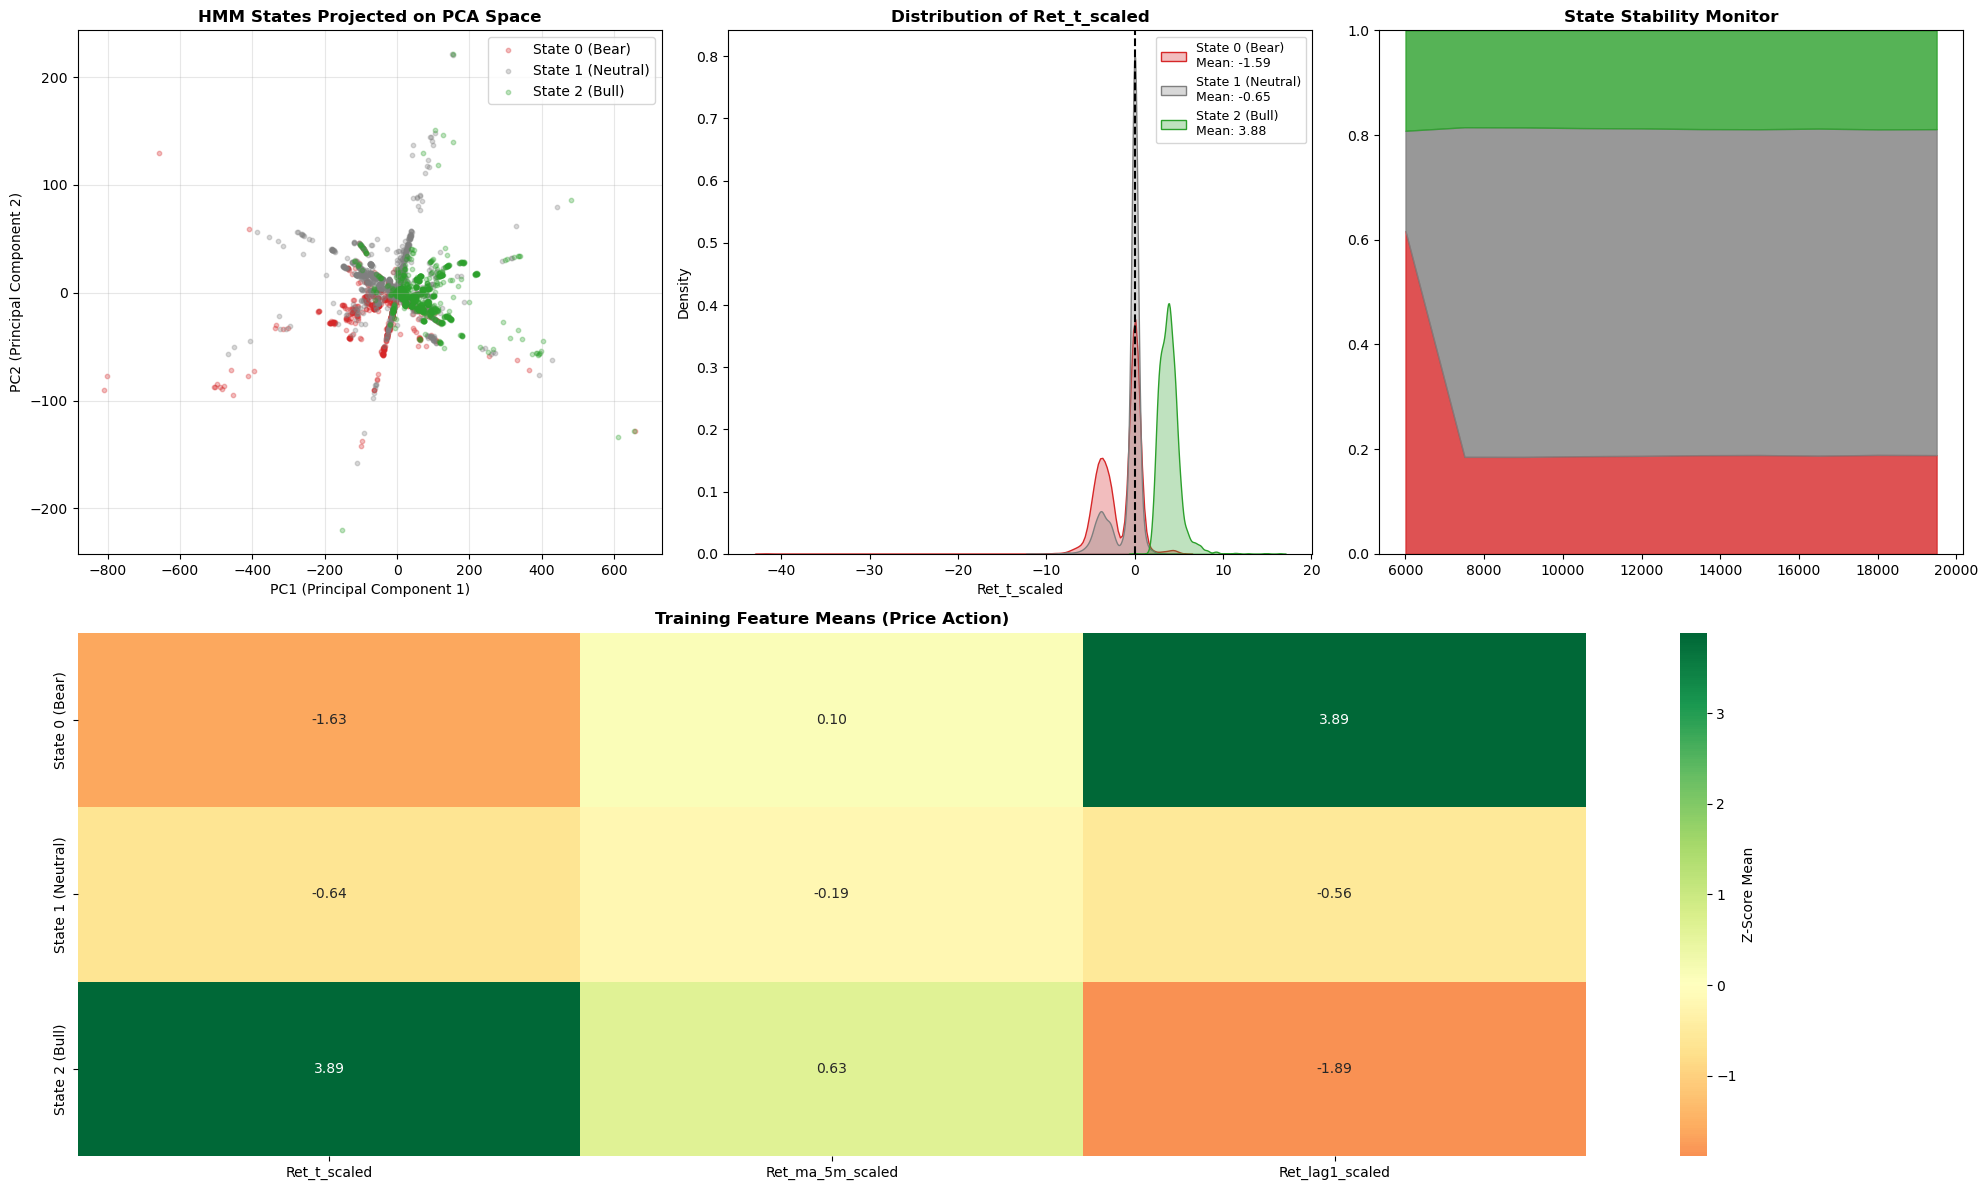


【5. 輸出結果】
shape: (3, 5)
┌─────────────────┬───────┬───────────┬────────────┬───────────┐
│ HMM_State_Final ┆ Count ┆ Ret_Mean  ┆ PC1_Mean   ┆ PC2_Mean  │
│ ---             ┆ ---   ┆ ---       ┆ ---        ┆ ---       │
│ i32             ┆ u32   ┆ f64       ┆ f64        ┆ f64       │
╞═════════════════╪═══════╪═══════════╪════════════╪═══════════╡
│ 0               ┆ 3836  ┆ -1.592251 ┆ -10.331846 ┆ -3.859313 │
│ 1               ┆ 12932 ┆ -0.647837 ┆ -1.972456  ┆ 1.311038  │
│ 2               ┆ 3838  ┆ 3.87788   ┆ 16.972579  ┆ -0.560193 │
└─────────────────┴───────┴───────────┴────────────┴───────────┘


In [22]:
# ============================================================
# Cell 8c: 擴充視窗 HMM (Ret Training + PCA Visualization)
# ============================================================
# 策略核心：
# 1. 訓練 (Training): 使用純價格動能 (Ret, MA, Lag)。
#    - 這是為了確保狀態定義符合「漲/跌/盤」的交易邏輯。
# 2. 觀察 (Observation): 使用 PCA1 vs PCA2。
#    - 這是為了驗證這些價格狀態在「主成分空間」中是否自然分離。
# ============================================================

import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import gc
import polars as pl
from pathlib import Path
from tqdm.auto import tqdm
import copy
from sklearn.preprocessing import StandardScaler

# 設定路徑
# OUT = Path("./output") 

def log(msg): print(msg)

log("=" * 60)
log("【步驟 8c】擴充視窗 HMM (Ret 訓練 -> PCA 視覺化)")
log("=" * 60)

# ---------- 1. 定義特徵 ----------
# 【訓練用】：只用價格動能，確保狀態物理意義明確
TRAIN_FEATURES = [
    "Ret_t_scaled",         # 方向
    "Ret_ma_5m_scaled",     # 趨勢
    "Ret_lag1_scaled"       # 慣性
]

# 【視覺化用】：使用 PCA 軸
VIZ_FEATURES = ["PCA1", "PCA2"]  # 預設名稱，稍後會自動檢查

# 狀態排序依據：回報率 (跌 -> 漲)
SORT_METRIC = "Ret_t_scaled"

log(f"✔ 訓練特徵 (Model Input): {TRAIN_FEATURES}")
log(f"✔ 視覺化軸 (Visual Axis): {VIZ_FEATURES}")

# ---------- 2. 讀取資料 ----------
feature_file = OUT / "step3_features_with_pca.parquet"
if not feature_file.exists():
    raise FileNotFoundError("找不到 Step 3 的 PCA 資料，請先執行 Step 3。")

df_raw = pl.read_parquet(feature_file)

# 確保排序
if "Date" in df_raw.columns and "Time" in df_raw.columns:
    df_raw = df_raw.sort(["Date", "Time"])

# --- 自動偵測 PCA 欄位名稱 ---
# 有些時候 PCA 欄位可能是 PC1, PC2 或 PCA1, PCA2
cols = df_raw.columns
if "PCA1" in cols and "PCA2" in cols:
    VIZ_FEATURES = ["PCA1", "PCA2"]
elif "PC1" in cols and "PC2" in cols:
    VIZ_FEATURES = ["PC1", "PC2"]
else:
    log("⚠ 警告：找不到 PCA 欄位，將改用 Ret_t 與 MA 繪圖")
    VIZ_FEATURES = ["Ret_t_scaled", "Ret_ma_5m_scaled"]

log(f"✔ 確認使用視覺化欄位: {VIZ_FEATURES}")

# 提取訓練資料
X_train_data = df_raw.select(TRAIN_FEATURES).to_numpy().astype(np.float64)
# 提取用於排序的欄位索引
SORT_COL_IDX = TRAIN_FEATURES.index(SORT_METRIC)

log(f"✔ 樣本數：{len(X_train_data):,}")

# ---------- 3. 設定 HMM ----------
N_STATES = 3
N_ITER_ROLLING = 200
TOL = 1e-4
COVARIANCE_TYPE = "tied" # 維持 Tied 以強化分離度

# ---------- 4. 滾動參數 ----------
TRADING_HOURS_PER_DAY = 5
MINUTES_PER_DAY = TRADING_HOURS_PER_DAY * 60          
STEP_DAYS = 5
STEP_SIZE = STEP_DAYS * MINUTES_PER_DAY               
MIN_TRAIN_DAYS = 20
MIN_TRAIN_SIZE = MIN_TRAIN_DAYS * MINUTES_PER_DAY     

# ---------- 5. 初始化 ----------
rolling_states = np.full(len(X_train_data), -1, dtype=int)
prev_model = None
curr_idx = MIN_TRAIN_SIZE
total_steps = (len(X_train_data) - MIN_TRAIN_SIZE) // STEP_SIZE + 1

monitor_history = {"step_idx": [], "state_freqs": []}

# ---------- 6. 滾動訓練 ----------
log("\n" + "=" * 60)
log("【2. 開始滾動訓練】")
log("=" * 60)

with tqdm(total=total_steps, desc="Expanding Window", unit="step") as pbar:
    while curr_idx < len(X_train_data):
        X_train = X_train_data[:curr_idx]
        test_end = min(curr_idx + STEP_SIZE, len(X_train_data))
        X_test = X_train_data[curr_idx:test_end]
        
        if len(X_test) == 0: break

        curr_hmm = GaussianHMM(
            n_components=N_STATES, covariance_type=COVARIANCE_TYPE,
            n_iter=N_ITER_ROLLING, tol=TOL, random_state=42, verbose=0,
            init_params='stmc' if prev_model is None else '' 
        )

        if prev_model is not None:
            curr_hmm.startprob_ = prev_model.startprob_.copy()
            curr_hmm.transmat_  = prev_model.transmat_.copy()
            curr_hmm.means_     = prev_model.means_.copy()
            prev_cov = prev_model.covars_
            if prev_cov.ndim == 3:
                curr_hmm.covars_ = prev_cov[0].copy()
            else:
                curr_hmm.covars_ = prev_cov.copy()

        try:
            curr_hmm.fit(X_train)
            
            # 對齊 (依 Ret_t 排序：State 0=Bear, State 2=Bull)
            means_target = curr_hmm.means_[:, SORT_COL_IDX]
            sorted_indices = np.argsort(means_target)
            
            curr_hmm.means_     = curr_hmm.means_[sorted_indices]
            curr_hmm.startprob_ = curr_hmm.startprob_[sorted_indices]
            curr_hmm.transmat_  = curr_hmm.transmat_[sorted_indices, :][:, sorted_indices]
            
            state_map = {old: new for new, old in enumerate(sorted_indices)}
            preds_test_raw = curr_hmm.predict(X_test)
            preds_test_aligned = np.array([state_map[p] for p in preds_test_raw])
            rolling_states[curr_idx:test_end] = preds_test_aligned
            
            # 監控
            preds_train_raw = curr_hmm.predict(X_train)
            preds_train_aligned = np.array([state_map[p] for p in preds_train_raw])
            counts = np.bincount(preds_train_aligned, minlength=N_STATES)
            monitor_history["state_freqs"].append(counts / counts.sum())
            monitor_history["step_idx"].append(curr_idx)
            
            prev_model = copy.deepcopy(curr_hmm)
            
        except Exception as e:
            pass

        curr_idx += STEP_SIZE
        pbar.update(1)
        if curr_idx % (STEP_SIZE * 5) == 0: gc.collect()

log(f"✔ 滾動訓練完成")

# ---------- 7. 最終狀態 ----------
final_model = prev_model
global_states_aligned = final_model.predict(X_train_data)

# ---------- 8. 視覺化 (X=PCA1, Y=PCA2) ----------
log("\n【4. 產生視覺化報告 (PCA視角)】")

COLORS_HMM = ['#D62728', '#7F7F7F', '#2CA02C'] 
state_labels = ["State 0 (Bear)", "State 1 (Neutral)", "State 2 (Bull)"]

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 3)

# 準備視覺化資料 (從原始 df 抓 PCA 欄位)
df_viz = df_raw.select(VIZ_FEATURES + ["Ret_t_scaled"]).to_pandas()
df_viz["State"] = global_states_aligned

feat_x = VIZ_FEATURES[0] # PCA1
feat_y = VIZ_FEATURES[1] # PCA2

# --- 1. PCA 散點圖 (這是您想看的部分) ---
ax1 = fig.add_subplot(gs[0, 0])

for s in range(N_STATES):
    mask = df_viz["State"] == s
    # 這裡畫的是 PCA1 vs PCA2
    ax1.scatter(df_viz.loc[mask, feat_x], df_viz.loc[mask, feat_y],
               c=[COLORS_HMM[s]], label=state_labels[s], s=10, alpha=0.3, rasterized=True)

ax1.set_xlabel(f"{feat_x} (Principal Component 1)")
ax1.set_ylabel(f"{feat_y} (Principal Component 2)")
ax1.set_title(f"HMM States Projected on PCA Space", fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# --- 2. 回報率分佈 (確認用 Ret 訓練的結果是否分離) ---
ax2 = fig.add_subplot(gs[0, 1])
for s in range(N_STATES):
    subset = df_viz[df_viz["State"] == s]["Ret_t_scaled"]
    sns.kdeplot(subset, ax=ax2, color=COLORS_HMM[s], fill=True, alpha=0.3, 
                label=f"{state_labels[s]}\nMean: {subset.mean():.2f}")
ax2.axvline(0, color='k', linestyle='--')
ax2.set_title(f"Distribution of Ret_t_scaled", fontweight='bold')
ax2.legend(fontsize=9)

# --- 3. 穩定性 ---
ax3 = fig.add_subplot(gs[0, 2])
steps = monitor_history["step_idx"]
freqs = np.array(monitor_history["state_freqs"])
bottom = np.zeros(len(steps))
for i in range(N_STATES):
    ax3.fill_between(steps, bottom, bottom + freqs[:, i], 
                    color=COLORS_HMM[i], alpha=0.8, label=state_labels[i])
    bottom += freqs[:, i]
ax3.set_title("State Stability Monitor", fontweight='bold')
ax3.set_ylim(0, 1)

# --- 4. 熱力圖 (觀察訓練特徵) ---
ax4 = fig.add_subplot(gs[1, :])
means_df = pd.DataFrame(final_model.means_, columns=TRAIN_FEATURES, index=state_labels)
sns.heatmap(means_df, annot=True, fmt=".2f", cmap="RdYlGn", center=0, ax=ax4, cbar_kws={'label': 'Z-Score Mean'})
ax4.set_title("Training Feature Means (Price Action)", fontweight='bold')

plt.tight_layout()
plt.savefig(OUT / "hmm_ret_pca_view.png", dpi=300)
log(f"✔ 分析圖表已儲存: hmm_ret_pca_view.png")
plt.show()

# ---------- 9. 輸出 ----------
log("\n【5. 輸出結果】")

df_final = df_raw.with_columns([
    pl.Series("HMM_State_Final", global_states_aligned).cast(pl.Int32),
    pl.Series("HMM_State_Rolling", rolling_states).cast(pl.Int32)
])
out_parquet = OUT / "step4_features_with_hmm.parquet"
df_final.write_parquet(out_parquet)

with open(OUT / "hmm_model_final.pkl", "wb") as f:
    pickle.dump(final_model, f)

# 【修正】：統計表現在會顯示 PCA 的平均值，這才是您想看的
stats = df_final.group_by("HMM_State_Final").agg([
    pl.len().alias("Count"),
    pl.col("Ret_t_scaled").mean().alias("Ret_Mean"),
    # 這裡加入 PCA 的統計
    pl.col(VIZ_FEATURES[0]).mean().alias(f"{VIZ_FEATURES[0]}_Mean"),
    pl.col(VIZ_FEATURES[1]).mean().alias(f"{VIZ_FEATURES[1]}_Mean")
]).sort("HMM_State_Final")

stats.write_csv(OUT / "hmm_state_stats.csv")
print(stats)


【步驟 8d】HMM 機率轉移矩陣分析

【機率轉移矩陣 (Transition Matrix)】
直行(Row)=當前狀態, 橫列(Col)=下一時刻狀態
             Bear (0)  Neutral (1)  Bull (2)
Bear (0)       0.0000       0.7990    0.2010
Neutral (1)    0.0000       0.7647    0.2353
Bull (2)       0.9992       0.0000    0.0008


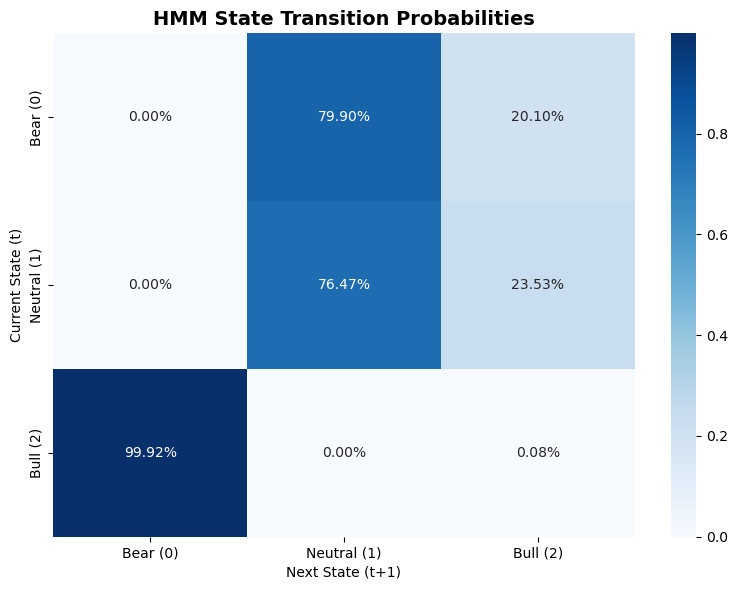


【狀態平均持續時間 (Expected Duration)】
         State Self_Prob Avg_Bars Est_Minutes
0     Bear (0)     0.00%      1.0       5 min
1  Neutral (1)    76.47%      4.3      21 min
2     Bull (2)     0.08%      1.0       5 min

【市場微結構診斷】
🔹 Bear -> Bull (V轉) 機率: 20.10%
🔹 Bull -> Bear (A轉) 機率: 99.92%
⚠ 結論：市場呈現高波動『震盪特性』，容易急漲急跌 (Mean Reversion)。

✅ 分析完成！圖表已儲存至: hmm_transition_matrix.png


In [23]:
# ============================================================
# Cell 8d: HMM 機率轉移矩陣分析 (Transition Matrix)
# ============================================================
# 分析目標：
# 1. 了解狀態的「黏著度」(Self-Transition)：一旦進入某狀態，會持續多久？
# 2. 了解狀態的「流動方向」：跌 (State 0) 之後是容易漲 (State 2) 還是盤 (State 1)？
# ============================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from pathlib import Path

# 設定路徑
# OUT = Path("./output") 

def log(msg): print(msg)

log("=" * 60)
log("【步驟 8d】HMM 機率轉移矩陣分析")
log("=" * 60)

# ---------- 1. 讀取模型 ----------
model_path = OUT / "hmm_model_final.pkl"
if not model_path.exists():
    raise FileNotFoundError("找不到模型檔案，請先執行 Step 8c。")

with open(model_path, "rb") as f:
    model = pickle.load(f)

# 定義標籤 (3群)
state_labels = ["Bear (0)", "Neutral (1)", "Bull (2)"]

# ---------- 2. 提取轉移矩陣 ----------
trans_mat = model.transmat_

# 轉為 DataFrame 以利閱讀
df_trans = pd.DataFrame(trans_mat, index=state_labels, columns=state_labels)

log("\n【機率轉移矩陣 (Transition Matrix)】")
log("直行(Row)=當前狀態, 橫列(Col)=下一時刻狀態")
print(df_trans.round(4))

# ---------- 3. 視覺化 (熱力圖) ----------
plt.figure(figsize=(8, 6))
sns.heatmap(df_trans, annot=True, fmt=".2%", cmap="Blues", cbar=True,
            xticklabels=state_labels, yticklabels=state_labels)

plt.title("HMM State Transition Probabilities", fontsize=14, fontweight='bold')
plt.ylabel("Current State (t)")
plt.xlabel("Next State (t+1)")
plt.tight_layout()
plt.savefig(OUT / "hmm_transition_matrix.png", dpi=300)
plt.show()

# ---------- 4. 計算平均持續時間 (Expected Duration) ----------
# 公式： 1 / (1 - self_transition_prob)
log("\n【狀態平均持續時間 (Expected Duration)】")
durations = []

for i in range(len(state_labels)):
    self_prob = trans_mat[i, i]
    # 避免除以 0
    if self_prob >= 1.0:
        avg_len = float('inf')
    else:
        avg_len = 1 / (1 - self_prob)
        
    # 假設一根 K 線是 5 分鐘 (請依實際調整)
    est_time = avg_len * 5 
    
    durations.append({
        "State": state_labels[i],
        "Self_Prob": f"{self_prob:.2%}",
        "Avg_Bars": f"{avg_len:.1f}",
        "Est_Minutes": f"{est_time:.0f} min"
    })

df_dur = pd.DataFrame(durations)
print(df_dur)

# ---------- 5. 判斷市場特性 ----------
log("\n【市場微結構診斷】")
prob_bear_to_bull = trans_mat[0, 2]
prob_bull_to_bear = trans_mat[2, 0]

log(f"🔹 Bear -> Bull (V轉) 機率: {prob_bear_to_bull:.2%}")
log(f"🔹 Bull -> Bear (A轉) 機率: {prob_bull_to_bear:.2%}")

if prob_bear_to_bull > 0.1 and prob_bull_to_bear > 0.1:
    log("⚠ 結論：市場呈現高波動『震盪特性』，容易急漲急跌 (Mean Reversion)。")
elif trans_mat[0, 0] > 0.8 and trans_mat[2, 2] > 0.8:
    log("⚠ 結論：市場呈現高黏著『趨勢特性』，一旦發動容易延續 (Trend Following)。")
else:
    log("⚠ 結論：市場處於混合狀態。")

log(f"\n✅ 分析完成！圖表已儲存至: hmm_transition_matrix.png")

In [24]:
# ============================================================
# Cell 13: 驗證異常轉移 (Bull -> Bear 視覺化檢查)
# ============================================================
# 目標：
# 數據顯示 Bull(2) -> Bear(0) 機率高達 99.9%。
# 我們要找出這些時刻，畫出 K 線圖，確認是否為「A型反轉 (A-Top)」。
# ============================================================

import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pathlib import Path

# 設定路徑
# OUT = Path("./output") 

def log(msg): print(msg)

log("=" * 60)
log("【步驟 13】異常轉移路徑視覺化 (Bull -> Bear)")
log("=" * 60)

# ---------- 1. 讀取資料 ----------
parquet_path = OUT / "step4_features_with_hmm.parquet"
df = pl.read_parquet(parquet_path).sort("SnapshotTime")

# 轉為 Pandas
df_plot = df.select(["SnapshotTime", "Price", "HMM_State_Final"]).to_pandas()
states = df_plot["HMM_State_Final"].values
times = df_plot["SnapshotTime"].values
prices = df_plot["Price"].values

# ---------- 2. 搜尋特定模式 ----------
# 模式：Neutral(1) -> Bull(2) -> Bear(0) -> Neutral(1)
# 這是標準的「拉高出貨」路徑
target_pattern = [2, 0] # 只要抓到 Bull 接 Bear 就行
indices = []

# 掃描序列
for i in range(len(states) - 2):
    if states[i] == target_pattern[0] and states[i+1] == target_pattern[1]:
        indices.append(i)

log(f"🔍 發現 {len(indices)} 次 [Bull -> Bear] 的直接反轉。")

# ---------- 3. 隨機抽樣繪圖 ----------
# 隨機選 3 個案例來畫圖
if len(indices) > 0:
    samples = np.random.choice(indices, min(3, len(indices)), replace=False)
    
    for idx in samples:
        # 取前後 10 根 K 線
        start_pos = max(0, idx - 10)
        end_pos = min(len(df_plot), idx + 15)
        
        subset = df_plot.iloc[start_pos:end_pos].copy()
        
        # 繪圖
        fig = go.Figure()
        
        # 畫價格線
        fig.add_trace(go.Scatter(
            x=subset["SnapshotTime"], y=subset["Price"],
            mode='lines+markers',
            name='Price',
            line=dict(color='gray', width=1)
        ))
        
        # 標記 Bull (2) 點
        mask_bull = subset["HMM_State_Final"] == 2
        fig.add_trace(go.Scatter(
            x=subset.loc[mask_bull, "SnapshotTime"], 
            y=subset.loc[mask_bull, "Price"],
            mode='markers', name='Bull (2)',
            marker=dict(color='green', size=12, symbol='triangle-up')
        ))
        
        # 標記 Bear (0) 點
        mask_bear = subset["HMM_State_Final"] == 0
        fig.add_trace(go.Scatter(
            x=subset.loc[mask_bear, "SnapshotTime"], 
            y=subset.loc[mask_bear, "Price"],
            mode='markers', name='Bear (0)',
            marker=dict(color='red', size=12, symbol='triangle-down')
        ))
        
        t_str = pd.to_datetime(times[idx]).strftime('%Y-%m-%d %H:%M')
        
        fig.update_layout(
            title=f"Case Study: Bull->Bear Reversal at {t_str}",
            template="plotly_dark",
            height=400
        )
        fig.show()
else:
    log("⚠ 未發現指定模式。")

# ---------- 4. 策略建議 ----------
log("\n【策略邏輯修正建議】")
log("如果您確認圖中都是『A轉』(尖頭反轉)，策略應調整為：")
log("1. 見到 Bull (2) -> 準備放空 (因為下一根 99.9% 是 Bear)")
log("2. 見到 Bear (0) -> 準備平倉或做多 (因為下一根 80% 回 Neutral)")
log("這種現象代表這是一個『刷單盤 (Mean Reverting)』而非『趨勢盤』。")

【步驟 13】異常轉移路徑視覺化 (Bull -> Bear)
🔍 發現 3797 次 [Bull -> Bear] 的直接反轉。



【策略邏輯修正建議】
如果您確認圖中都是『A轉』(尖頭反轉)，策略應調整為：
1. 見到 Bull (2) -> 準備放空 (因為下一根 99.9% 是 Bear)
2. 見到 Bear (0) -> 準備平倉或做多 (因為下一根 80% 回 Neutral)
這種現象代表這是一個『刷單盤 (Mean Reverting)』而非『趨勢盤』。


### ｎ = 5

【步驟 8c】擴充視窗 HMM (Ret 訓練 -> PCA 視覺化) - 5 States版
✔ 訓練特徵 (Model Input): ['Ret_t_scaled', 'Ret_ma_5m_scaled', 'Ret_lag1_scaled']
✔ 視覺化軸 (Visual Axis): ['PCA1', 'PCA2']
✔ 確認使用視覺化欄位: ['PC1', 'PC2']
✔ 樣本數：20,606

【2. 開始滾動訓練 (5 States)】


Expanding Window:   0%|          | 0/10 [00:00<?, ?step/s]

✔ 滾動訓練完成

【4. 產生視覺化報告 (PCA視角 - 5 States)】
✔ 分析圖表已儲存: hmm_ret_pca_view_5states.png


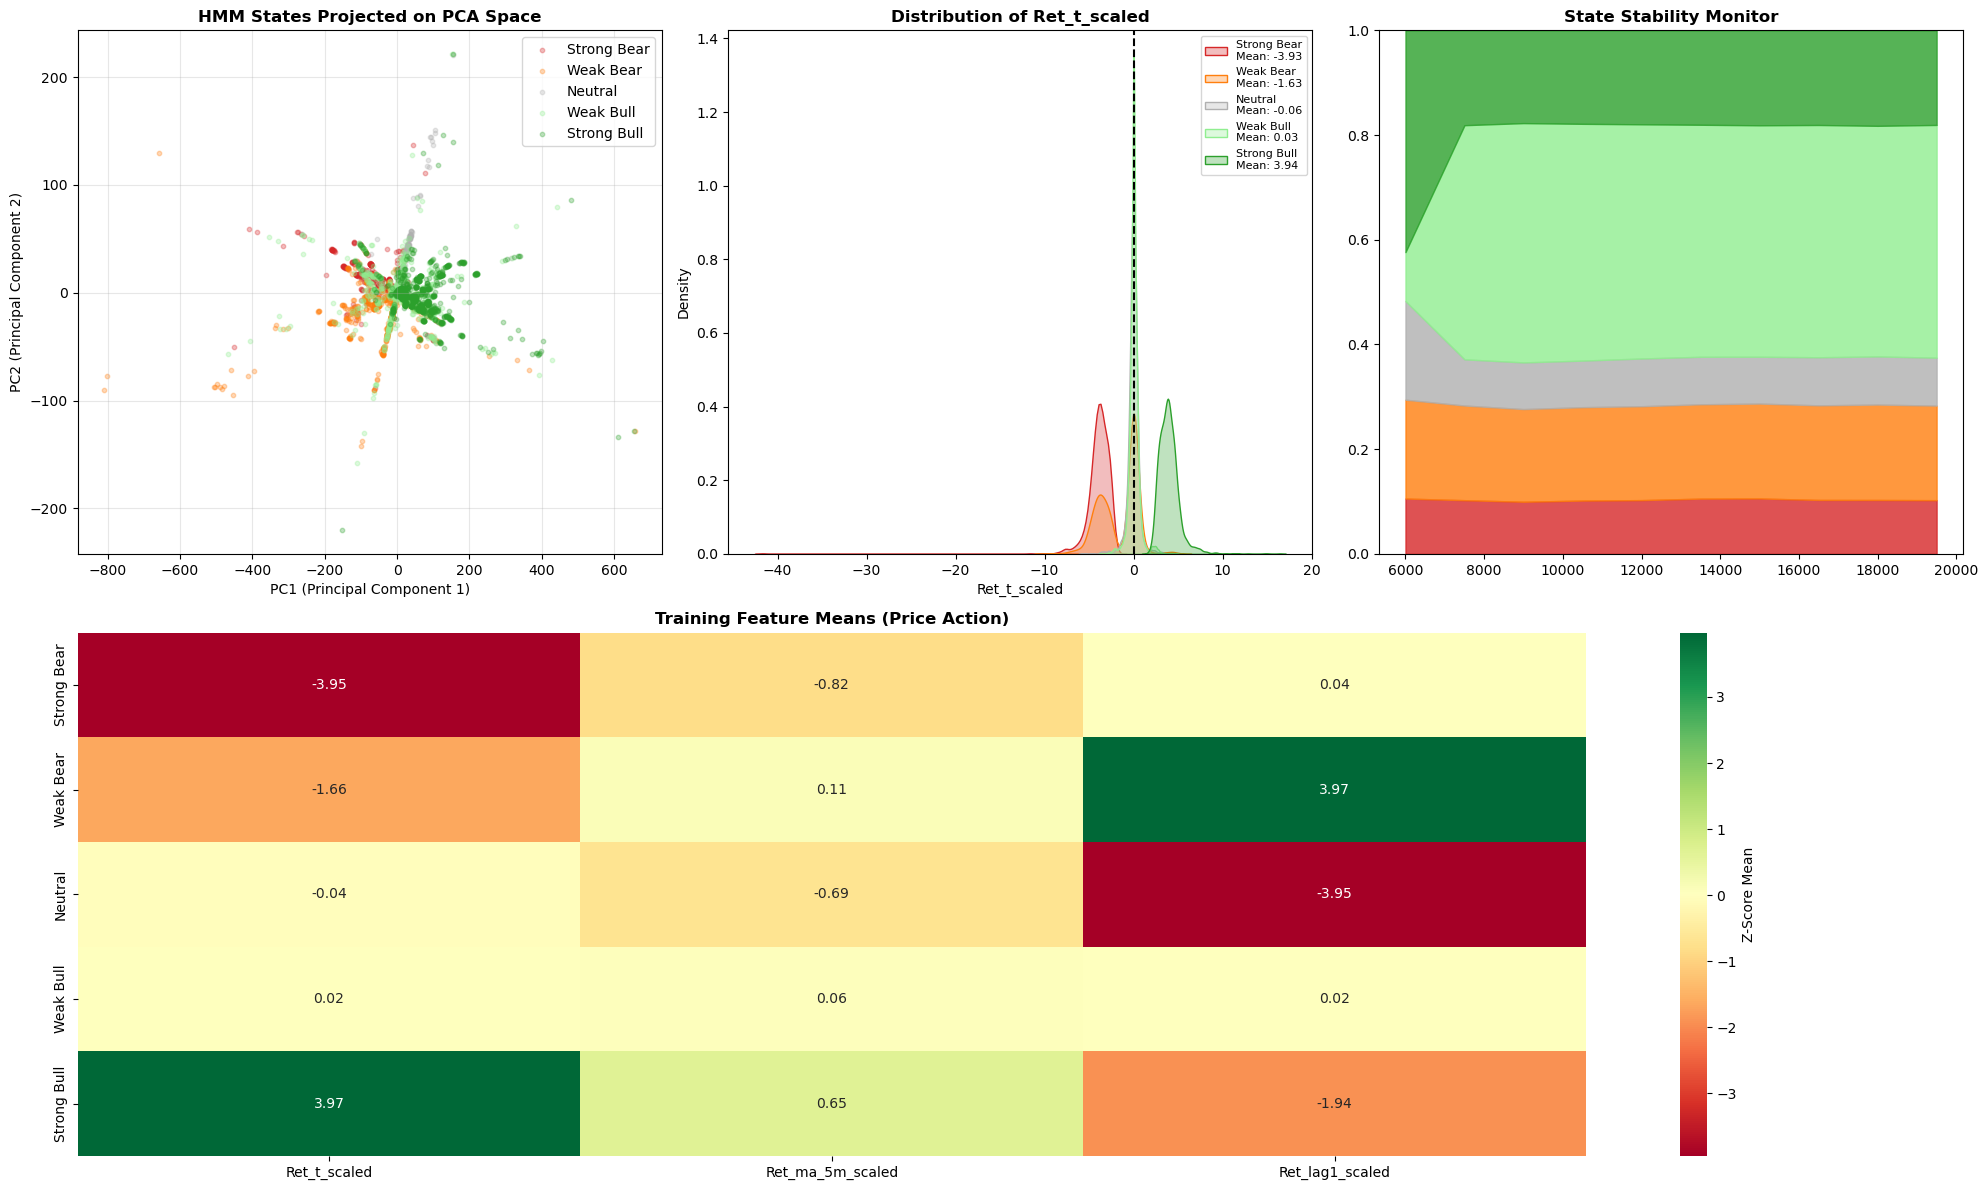


【5. 輸出結果】
shape: (5, 5)
┌─────────────────┬───────┬───────────┬────────────┬───────────┐
│ HMM_State_Final ┆ Count ┆ Ret_Mean  ┆ PC1_Mean   ┆ PC2_Mean  │
│ ---             ┆ ---   ┆ ---       ┆ ---        ┆ ---       │
│ i32             ┆ u32   ┆ f64       ┆ f64        ┆ f64       │
╞═════════════════╪═══════╪═══════════╪════════════╪═══════════╡
│ 0               ┆ 2098  ┆ -3.925762 ┆ -14.95239  ┆ 3.169474  │
│ 1               ┆ 3671  ┆ -1.63332  ┆ -10.628179 ┆ -3.914318 │
│ 2               ┆ 1857  ┆ -0.059881 ┆ 3.87344    ┆ 5.436475  │
│ 3               ┆ 9307  ┆ 0.027485  ┆ -0.043456  ┆ -0.026757 │
│ 4               ┆ 3673  ┆ 3.943688  ┆ 17.314898  ┆ -0.578981 │
└─────────────────┴───────┴───────────┴────────────┴───────────┘
✅ 完成！5 狀態模型訓練完畢。


In [19]:
# ============================================================
# Cell 8c: 擴充視窗 HMM (Ret Training + PCA Visualization) - 5 States
# ============================================================
# 策略核心：
# 1. 訓練 (Training): 使用純價格動能 (Ret, MA, Lag)。
#    - N_STATES = 5 (Strong Bear, Weak Bear, Neutral, Weak Bull, Strong Bull)
# 2. 觀察 (Observation): 使用 PCA1 vs PCA2。
# ============================================================

import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import gc
import polars as pl
from pathlib import Path
from tqdm.auto import tqdm
import copy
from sklearn.preprocessing import StandardScaler

# 設定路徑
# OUT = Path("./output") 

def log(msg): print(msg)

log("=" * 60)
log("【步驟 8c】擴充視窗 HMM (Ret 訓練 -> PCA 視覺化) - 5 States版")
log("=" * 60)

# ---------- 1. 定義特徵 ----------
# 【訓練用】：只用價格動能
TRAIN_FEATURES = [
    "Ret_t_scaled",         # 方向
    "Ret_ma_5m_scaled",     # 趨勢
    "Ret_lag1_scaled"       # 慣性
]

# 【視覺化用】：使用 PCA 軸
VIZ_FEATURES = ["PCA1", "PCA2"] 

# 狀態排序依據：回報率 (跌 -> 漲)
SORT_METRIC = "Ret_t_scaled"

log(f"✔ 訓練特徵 (Model Input): {TRAIN_FEATURES}")
log(f"✔ 視覺化軸 (Visual Axis): {VIZ_FEATURES}")

# ---------- 2. 讀取資料 ----------
feature_file = OUT / "step3_features_with_pca.parquet"
if not feature_file.exists():
    # 嘗試備用路徑
    feature_file = Path("./output_v全域版/step3_features_with_pca.parquet")
    
if not feature_file.exists():
    raise FileNotFoundError("找不到 Step 3 的 PCA 資料，請確認路徑。")

df_raw = pl.read_parquet(feature_file)

# 確保排序
if "Date" in df_raw.columns and "Time" in df_raw.columns:
    df_raw = df_raw.sort(["Date", "Time"])

# --- 自動偵測 PCA 欄位名稱 ---
cols = df_raw.columns
if "PCA1" in cols and "PCA2" in cols:
    VIZ_FEATURES = ["PCA1", "PCA2"]
elif "PC1" in cols and "PC2" in cols:
    VIZ_FEATURES = ["PC1", "PC2"]
else:
    log("⚠ 警告：找不到 PCA 欄位，將改用 Ret_t 與 MA 繪圖")
    VIZ_FEATURES = ["Ret_t_scaled", "Ret_ma_5m_scaled"]

log(f"✔ 確認使用視覺化欄位: {VIZ_FEATURES}")

# 提取訓練資料
X_train_data = df_raw.select(TRAIN_FEATURES).to_numpy().astype(np.float64)
# 提取用於排序的欄位索引
SORT_COL_IDX = TRAIN_FEATURES.index(SORT_METRIC)

log(f"✔ 樣本數：{len(X_train_data):,}")

# ---------- 3. 設定 HMM (改為 5 狀態) ----------
N_STATES = 5  # <--- 修改這裡
N_ITER_ROLLING = 200
TOL = 1e-4
COVARIANCE_TYPE = "tied" # 維持 Tied 以強化分離度
MIN_COVAR = 1e-3 # 防止矩陣奇異

# ---------- 4. 滾動參數 ----------
TRADING_HOURS_PER_DAY = 5
MINUTES_PER_DAY = TRADING_HOURS_PER_DAY * 60          
STEP_DAYS = 5
STEP_SIZE = STEP_DAYS * MINUTES_PER_DAY               
MIN_TRAIN_DAYS = 20
MIN_TRAIN_SIZE = MIN_TRAIN_DAYS * MINUTES_PER_DAY     

# ---------- 5. 初始化 ----------
rolling_states = np.full(len(X_train_data), -1, dtype=int)
prev_model = None
curr_idx = MIN_TRAIN_SIZE
total_steps = (len(X_train_data) - MIN_TRAIN_SIZE) // STEP_SIZE + 1

monitor_history = {"step_idx": [], "state_freqs": []}

# ---------- 6. 滾動訓練 ----------
log("\n" + "=" * 60)
log(f"【2. 開始滾動訓練 ({N_STATES} States)】")
log("=" * 60)

with tqdm(total=total_steps, desc="Expanding Window", unit="step") as pbar:
    while curr_idx < len(X_train_data):
        X_train = X_train_data[:curr_idx]
        test_end = min(curr_idx + STEP_SIZE, len(X_train_data))
        X_test = X_train_data[curr_idx:test_end]
        
        if len(X_test) == 0: break

        curr_hmm = GaussianHMM(
            n_components=N_STATES, covariance_type=COVARIANCE_TYPE,
            n_iter=N_ITER_ROLLING, tol=TOL, random_state=42, verbose=0,
            init_params='stmc' if prev_model is None else '',
            min_covar=MIN_COVAR
        )

        if prev_model is not None:
            curr_hmm.startprob_ = prev_model.startprob_.copy()
            curr_hmm.transmat_  = prev_model.transmat_.copy()
            curr_hmm.means_     = prev_model.means_.copy()
            prev_cov = prev_model.covars_
            if prev_cov.ndim == 3:
                curr_hmm.covars_ = prev_cov[0].copy()
            else:
                curr_hmm.covars_ = prev_cov.copy()

        try:
            curr_hmm.fit(X_train)
            
            # 對齊 (依 Ret_t 排序：State 0=Strong Bear ... State 4=Strong Bull)
            means_target = curr_hmm.means_[:, SORT_COL_IDX]
            sorted_indices = np.argsort(means_target)
            
            curr_hmm.means_     = curr_hmm.means_[sorted_indices]
            curr_hmm.startprob_ = curr_hmm.startprob_[sorted_indices]
            curr_hmm.transmat_  = curr_hmm.transmat_[sorted_indices, :][:, sorted_indices]
            
            state_map = {old: new for new, old in enumerate(sorted_indices)}
            preds_test_raw = curr_hmm.predict(X_test)
            preds_test_aligned = np.array([state_map[p] for p in preds_test_raw])
            rolling_states[curr_idx:test_end] = preds_test_aligned
            
            # 監控
            preds_train_raw = curr_hmm.predict(X_train)
            preds_train_aligned = np.array([state_map[p] for p in preds_train_raw])
            counts = np.bincount(preds_train_aligned, minlength=N_STATES)
            monitor_history["state_freqs"].append(counts / counts.sum())
            monitor_history["step_idx"].append(curr_idx)
            
            prev_model = copy.deepcopy(curr_hmm)
            
        except Exception as e:
            pass

        curr_idx += STEP_SIZE
        pbar.update(1)
        if curr_idx % (STEP_SIZE * 5) == 0: gc.collect()

log(f"✔ 滾動訓練完成")

# ---------- 7. 最終狀態 ----------
final_model = prev_model
global_states_aligned = final_model.predict(X_train_data)

# ---------- 8. 視覺化 (X=PCA1, Y=PCA2) ----------
log("\n【4. 產生視覺化報告 (PCA視角 - 5 States)】")

# 定義 5 狀態的顏色與標籤
# 順序：強跌 -> 弱跌 -> 盤整 -> 弱漲 -> 強漲
COLORS_HMM = ['#D62728', '#FF7F0E', '#B0B0B0', '#90EE90', '#2CA02C'] 
state_labels = ["Strong Bear", "Weak Bear", "Neutral", "Weak Bull", "Strong Bull"]

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 3)

# 準備視覺化資料 (從原始 df 抓 PCA 欄位)
df_viz = df_raw.select(VIZ_FEATURES + ["Ret_t_scaled"]).to_pandas()
df_viz["State"] = global_states_aligned

feat_x = VIZ_FEATURES[0] # PCA1
feat_y = VIZ_FEATURES[1] # PCA2

# --- 1. PCA 散點圖 ---
ax1 = fig.add_subplot(gs[0, 0])

for s in range(N_STATES):
    mask = df_viz["State"] == s
    # 這裡畫的是 PCA1 vs PCA2
    ax1.scatter(df_viz.loc[mask, feat_x], df_viz.loc[mask, feat_y],
               c=[COLORS_HMM[s]], label=state_labels[s], s=10, alpha=0.3, rasterized=True)

ax1.set_xlabel(f"{feat_x} (Principal Component 1)")
ax1.set_ylabel(f"{feat_y} (Principal Component 2)")
ax1.set_title(f"HMM States Projected on PCA Space", fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# --- 2. 回報率分佈 ---
ax2 = fig.add_subplot(gs[0, 1])
for s in range(N_STATES):
    subset = df_viz[df_viz["State"] == s]["Ret_t_scaled"]
    sns.kdeplot(subset, ax=ax2, color=COLORS_HMM[s], fill=True, alpha=0.3, 
                label=f"{state_labels[s]}\nMean: {subset.mean():.2f}")
ax2.axvline(0, color='k', linestyle='--')
ax2.set_title(f"Distribution of Ret_t_scaled", fontweight='bold')
ax2.legend(fontsize=8)

# --- 3. 穩定性 ---
ax3 = fig.add_subplot(gs[0, 2])
steps = monitor_history["step_idx"]
freqs = np.array(monitor_history["state_freqs"])
bottom = np.zeros(len(steps))
for i in range(N_STATES):
    ax3.fill_between(steps, bottom, bottom + freqs[:, i], 
                    color=COLORS_HMM[i], alpha=0.8, label=state_labels[i])
    bottom += freqs[:, i]
ax3.set_title("State Stability Monitor", fontweight='bold')
ax3.set_ylim(0, 1)

# --- 4. 熱力圖 ---
ax4 = fig.add_subplot(gs[1, :])
means_df = pd.DataFrame(final_model.means_, columns=TRAIN_FEATURES, index=state_labels)
sns.heatmap(means_df, annot=True, fmt=".2f", cmap="RdYlGn", center=0, ax=ax4, cbar_kws={'label': 'Z-Score Mean'})
ax4.set_title("Training Feature Means (Price Action)", fontweight='bold')

plt.tight_layout()
plt.savefig(OUT / "hmm_ret_pca_view_5states.png", dpi=300)
log(f"✔ 分析圖表已儲存: hmm_ret_pca_view_5states.png")
plt.show()

# ---------- 9. 輸出 ----------
log("\n【5. 輸出結果】")

df_final = df_raw.with_columns([
    pl.Series("HMM_State_Final", global_states_aligned).cast(pl.Int32),
    pl.Series("HMM_State_Rolling", rolling_states).cast(pl.Int32)
])
out_parquet = OUT / "step4_features_with_hmm.parquet"
df_final.write_parquet(out_parquet)

with open(OUT / "hmm_model_final.pkl", "wb") as f:
    pickle.dump(final_model, f)

# 統計表
stats = df_final.group_by("HMM_State_Final").agg([
    pl.len().alias("Count"),
    pl.col("Ret_t_scaled").mean().alias("Ret_Mean"),
    # 這裡加入 PCA 的統計
    pl.col(VIZ_FEATURES[0]).mean().alias(f"{VIZ_FEATURES[0]}_Mean"),
    pl.col(VIZ_FEATURES[1]).mean().alias(f"{VIZ_FEATURES[1]}_Mean")
]).sort("HMM_State_Final")

stats.write_csv(OUT / "hmm_state_stats.csv")
print(stats)

log(f"✅ 完成！5 狀態模型訓練完畢。")

### n = 7

【步驟 8c】擴充視窗 HMM (Ret 訓練 -> PCA 視覺化) - 7 States
✔ 訓練特徵 (Model Input): ['Ret_t_scaled', 'Ret_ma_5m_scaled', 'Ret_lag1_scaled']
✔ 視覺化軸 (Visual Axis): ['PCA1', 'PCA2']
✔ 確認使用視覺化欄位: ['PC1', 'PC2']
✔ 樣本數：20,606
✔ 狀態數量：7

【2. 開始滾動訓練】


Expanding Window:   0%|          | 0/10 [00:00<?, ?step/s]

✔ 滾動訓練完成

【4. 產生視覺化報告 (PCA視角)】
✔ 分析圖表已儲存: hmm_ret_pca_view_7states.png


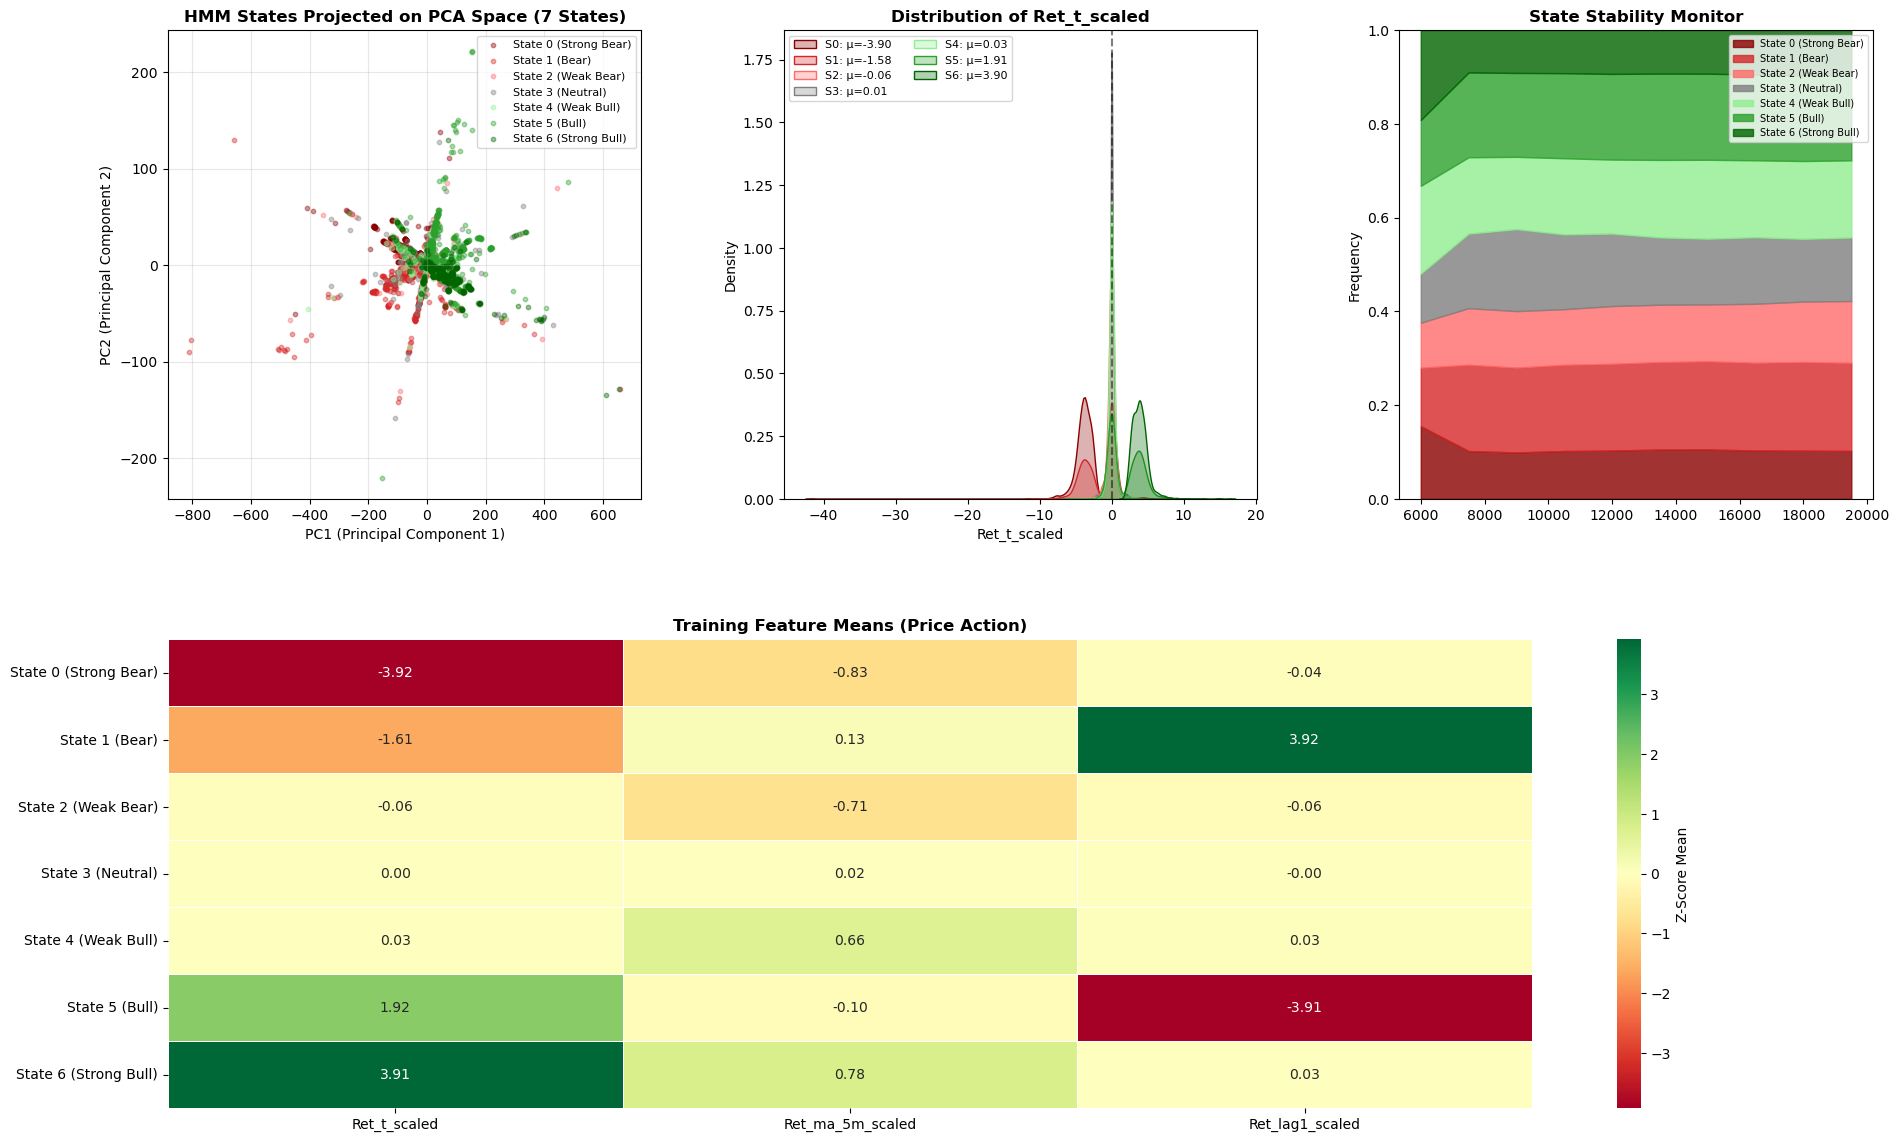


【5. 輸出結果】

【狀態統計】
shape: (7, 5)
┌─────────────────┬───────┬───────────┬────────────┬───────────┐
│ HMM_State_Final ┆ Count ┆ Ret_Mean  ┆ PC1_Mean   ┆ PC2_Mean  │
│ ---             ┆ ---   ┆ ---       ┆ ---        ┆ ---       │
│ i32             ┆ u32   ┆ f64       ┆ f64        ┆ f64       │
╞═════════════════╪═══════╪═══════════╪════════════╪═══════════╡
│ 0               ┆ 2092  ┆ -3.904381 ┆ -14.690357 ┆ 3.207774  │
│ 1               ┆ 3819  ┆ -1.582357 ┆ -10.342078 ┆ -3.992825 │
│ 2               ┆ 2697  ┆ -0.062051 ┆ 0.01251    ┆ -0.058613 │
│ 3               ┆ 2940  ┆ 0.006952  ┆ -0.227957  ┆ 0.111075  │
│ 4               ┆ 3415  ┆ 0.026612  ┆ -0.336032  ┆ 0.168612  │
│ 5               ┆ 3697  ┆ 1.912874  ┆ 10.664673  ┆ 3.639949  │
│ 6               ┆ 1946  ┆ 3.901712  ┆ 16.744775  ┆ -2.910199 │
└─────────────────┴───────┴───────────┴────────────┴───────────┘

✔ 7 狀態 HMM 分析完成！


In [11]:
# ============================================================
# Cell 8c: 擴充視窗 HMM (Ret Training + PCA Visualization)
# 【修改】：改為 7 個狀態
# ============================================================
# 策略核心：
# 1. 訓練 (Training): 使用純價格動能 (Ret, MA, Lag)。
#    - 這是為了確保狀態定義符合市場微觀結構。
# 2. 觀察 (Observation): 使用 PCA1 vs PCA2。
#    - 這是為了驗證這些價格狀態在「主成分空間」中是否自然分離。
# ============================================================

import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import gc
import polars as pl
from pathlib import Path
from tqdm.auto import tqdm
import copy
from sklearn.preprocessing import StandardScaler

# 設定路徑
# OUT = Path("./output") 

def log(msg): print(msg)

log("=" * 60)
log("【步驟 8c】擴充視窗 HMM (Ret 訓練 -> PCA 視覺化) - 7 States")
log("=" * 60)

# ---------- 1. 定義特徵 ----------
# 【訓練用】：只用價格動能，確保狀態物理意義明確
TRAIN_FEATURES = [
    "Ret_t_scaled",         # 方向
    "Ret_ma_5m_scaled",     # 趨勢
    "Ret_lag1_scaled"       # 慣性
]

# 【視覺化用】：使用 PCA 軸
VIZ_FEATURES = ["PCA1", "PCA2"]  # 預設名稱，稍後會自動檢查

# 狀態排序依據：回報率 (跌 -> 漲)
SORT_METRIC = "Ret_t_scaled"

log(f"✔ 訓練特徵 (Model Input): {TRAIN_FEATURES}")
log(f"✔ 視覺化軸 (Visual Axis): {VIZ_FEATURES}")

# ---------- 2. 讀取資料 ----------
feature_file = OUT / "step3_features_with_pca.parquet"
if not feature_file.exists():
    raise FileNotFoundError("找不到 Step 3 的 PCA 資料，請先執行 Step 3。")

df_raw = pl.read_parquet(feature_file)

# 確保排序
if "Date" in df_raw.columns and "Time" in df_raw.columns:
    df_raw = df_raw.sort(["Date", "Time"])

# --- 自動偵測 PCA 欄位名稱 ---
cols = df_raw.columns
if "PCA1" in cols and "PCA2" in cols:
    VIZ_FEATURES = ["PCA1", "PCA2"]
elif "PC1" in cols and "PC2" in cols:
    VIZ_FEATURES = ["PC1", "PC2"]
else:
    log("⚠ 警告：找不到 PCA 欄位，將改用 Ret_t 與 MA 繪圖")
    VIZ_FEATURES = ["Ret_t_scaled", "Ret_ma_5m_scaled"]

log(f"✔ 確認使用視覺化欄位: {VIZ_FEATURES}")

# 提取訓練資料
X_train_data = df_raw.select(TRAIN_FEATURES).to_numpy().astype(np.float64)
# 提取用於排序的欄位索引
SORT_COL_IDX = TRAIN_FEATURES.index(SORT_METRIC)

log(f"✔ 樣本數：{len(X_train_data):,}")

# ---------- 3. 設定 HMM ----------
# 【關鍵修改】：從 3 改為 7
N_STATES = 7
N_ITER_ROLLING = 200
TOL = 1e-4
COVARIANCE_TYPE = "tied"  # 維持 Tied 以強化分離度

log(f"✔ 狀態數量：{N_STATES}")

# ---------- 4. 滾動參數 ----------
TRADING_HOURS_PER_DAY = 5
MINUTES_PER_DAY = TRADING_HOURS_PER_DAY * 60          
STEP_DAYS = 5
STEP_SIZE = STEP_DAYS * MINUTES_PER_DAY               
MIN_TRAIN_DAYS = 20
MIN_TRAIN_SIZE = MIN_TRAIN_DAYS * MINUTES_PER_DAY     

# ---------- 5. 初始化 ----------
rolling_states = np.full(len(X_train_data), -1, dtype=int)
prev_model = None
curr_idx = MIN_TRAIN_SIZE
total_steps = (len(X_train_data) - MIN_TRAIN_SIZE) // STEP_SIZE + 1

monitor_history = {"step_idx": [], "state_freqs": []}

# ---------- 6. 滾動訓練 ----------
log("\n" + "=" * 60)
log("【2. 開始滾動訓練】")
log("=" * 60)

with tqdm(total=total_steps, desc="Expanding Window", unit="step") as pbar:
    while curr_idx < len(X_train_data):
        X_train = X_train_data[:curr_idx]
        test_end = min(curr_idx + STEP_SIZE, len(X_train_data))
        X_test = X_train_data[curr_idx:test_end]
        
        if len(X_test) == 0: break

        curr_hmm = GaussianHMM(
            n_components=N_STATES, covariance_type=COVARIANCE_TYPE,
            n_iter=N_ITER_ROLLING, tol=TOL, random_state=42, verbose=0,
            init_params='stmc' if prev_model is None else '' 
        )

        if prev_model is not None:
            curr_hmm.startprob_ = prev_model.startprob_.copy()
            curr_hmm.transmat_  = prev_model.transmat_.copy()
            curr_hmm.means_     = prev_model.means_.copy()
            prev_cov = prev_model.covars_
            if prev_cov.ndim == 3:
                curr_hmm.covars_ = prev_cov[0].copy()
            else:
                curr_hmm.covars_ = prev_cov.copy()

        try:
            curr_hmm.fit(X_train)
            
            # 對齊 (依 Ret_t 排序：State 0=最跌, ..., State 6=最漲)
            means_target = curr_hmm.means_[:, SORT_COL_IDX]
            sorted_indices = np.argsort(means_target)
            
            curr_hmm.means_     = curr_hmm.means_[sorted_indices]
            curr_hmm.startprob_ = curr_hmm.startprob_[sorted_indices]
            curr_hmm.transmat_  = curr_hmm.transmat_[sorted_indices, :][:, sorted_indices]
            
            state_map = {old: new for new, old in enumerate(sorted_indices)}
            preds_test_raw = curr_hmm.predict(X_test)
            preds_test_aligned = np.array([state_map[p] for p in preds_test_raw])
            rolling_states[curr_idx:test_end] = preds_test_aligned
            
            # 監控
            preds_train_raw = curr_hmm.predict(X_train)
            preds_train_aligned = np.array([state_map[p] for p in preds_train_raw])
            counts = np.bincount(preds_train_aligned, minlength=N_STATES)
            monitor_history["state_freqs"].append(counts / counts.sum())
            monitor_history["step_idx"].append(curr_idx)
            
            prev_model = copy.deepcopy(curr_hmm)
            
        except Exception as e:
            log(f"⚠ 訓練異常 (idx={curr_idx}): {str(e)}")
            pass

        curr_idx += STEP_SIZE
        pbar.update(1)
        if curr_idx % (STEP_SIZE * 5) == 0: gc.collect()

log(f"✔ 滾動訓練完成")

# ---------- 7. 最終狀態 ----------
final_model = prev_model
global_states_aligned = final_model.predict(X_train_data)

# ---------- 8. 定義狀態標籤 ----------
# 7 個狀態的標籤
STATE_LABELS_7 = [
    "State 0 (Strong Bear)",
    "State 1 (Bear)",
    "State 2 (Weak Bear)",
    "State 3 (Neutral)",
    "State 4 (Weak Bull)",
    "State 5 (Bull)",
    "State 6 (Strong Bull)"
]

COLORS_7 = [
    '#8B0000',  # 深紅
    '#D62728',  # 紅
    '#FF6B6B',  # 淺紅
    '#7F7F7F',  # 灰
    '#90EE90',  # 淺綠
    '#2CA02C',  # 綠
    '#006400'   # 深綠
]

# ---------- 9. 視覺化 (X=PCA1, Y=PCA2) ----------
log("\n【4. 產生視覺化報告 (PCA視角)】")

fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 準備視覺化資料 (從原始 df 抓 PCA 欄位)
df_viz = df_raw.select(VIZ_FEATURES + ["Ret_t_scaled"]).to_pandas()
df_viz["State"] = global_states_aligned

feat_x = VIZ_FEATURES[0]  # PCA1
feat_y = VIZ_FEATURES[1]  # PCA2

# --- 1. PCA 散點圖 ---
ax1 = fig.add_subplot(gs[0, 0])

for s in range(N_STATES):
    mask = df_viz["State"] == s
    ax1.scatter(df_viz.loc[mask, feat_x], df_viz.loc[mask, feat_y],
               c=[COLORS_7[s]], label=STATE_LABELS_7[s], s=10, alpha=0.4, rasterized=True)

ax1.set_xlabel(f"{feat_x} (Principal Component 1)")
ax1.set_ylabel(f"{feat_y} (Principal Component 2)")
ax1.set_title(f"HMM States Projected on PCA Space (7 States)", fontweight='bold', fontsize=12)
ax1.legend(fontsize=8, loc='best')
ax1.grid(alpha=0.3)

# --- 2. 回報率分佈 ---
ax2 = fig.add_subplot(gs[0, 1])
for s in range(N_STATES):
    subset = df_viz[df_viz["State"] == s]["Ret_t_scaled"]
    sns.kdeplot(subset, ax=ax2, color=COLORS_7[s], fill=True, alpha=0.3, 
                label=f"S{s}: μ={subset.mean():.2f}")
ax2.axvline(0, color='k', linestyle='--', alpha=0.5)
ax2.set_title(f"Distribution of Ret_t_scaled", fontweight='bold', fontsize=12)
ax2.legend(fontsize=8, ncol=2)

# --- 3. 穩定性監控 ---
ax3 = fig.add_subplot(gs[0, 2])
steps = monitor_history["step_idx"]
freqs = np.array(monitor_history["state_freqs"])
bottom = np.zeros(len(steps))
for i in range(N_STATES):
    ax3.fill_between(steps, bottom, bottom + freqs[:, i], 
                    color=COLORS_7[i], alpha=0.8, label=STATE_LABELS_7[i])
    bottom += freqs[:, i]
ax3.set_title("State Stability Monitor", fontweight='bold', fontsize=12)
ax3.set_ylabel("Frequency")
ax3.set_ylim(0, 1)
ax3.legend(fontsize=7, loc='best')

# --- 4. 熱力圖 (訓練特徵) ---
ax4 = fig.add_subplot(gs[1, :])
means_df = pd.DataFrame(final_model.means_, columns=TRAIN_FEATURES, index=STATE_LABELS_7)
sns.heatmap(means_df, annot=True, fmt=".2f", cmap="RdYlGn", center=0, ax=ax4, 
            cbar_kws={'label': 'Z-Score Mean'}, linewidths=0.5)
ax4.set_title("Training Feature Means (Price Action)", fontweight='bold', fontsize=12)

plt.savefig(OUT / "hmm_ret_pca_view_7states.png", dpi=300, bbox_inches='tight')
log(f"✔ 分析圖表已儲存: hmm_ret_pca_view_7states.png")
plt.show()

# ---------- 10. 輸出結果 ----------
log("\n【5. 輸出結果】")

df_final = df_raw.with_columns([
    pl.Series("HMM_State_Final", global_states_aligned).cast(pl.Int32),
    pl.Series("HMM_State_Rolling", rolling_states).cast(pl.Int32)
])
out_parquet = OUT / "step4_features_with_hmm_7states.parquet"
df_final.write_parquet(out_parquet)

with open(OUT / "hmm_model_final_7states.pkl", "wb") as f:
    pickle.dump(final_model, f)

# 統計表現
stats = df_final.group_by("HMM_State_Final").agg([
    pl.len().alias("Count"),
    pl.col("Ret_t_scaled").mean().alias("Ret_Mean"),
    pl.col(VIZ_FEATURES[0]).mean().alias(f"{VIZ_FEATURES[0]}_Mean"),
    pl.col(VIZ_FEATURES[1]).mean().alias(f"{VIZ_FEATURES[1]}_Mean")
]).sort("HMM_State_Final")

stats.write_csv(OUT / "hmm_state_stats_7states.csv")
log("\n【狀態統計】")
print(stats)

log("\n✔ 7 狀態 HMM 分析完成！")

### 比較3/5/7

【HMM 最优状态数对比分析 (Fix: Version Compatibility)】
✔ 样本数: 20,606
✔ 协方差类型: tied

【2. 训练多个 HMM 模型】

→ 正在训练 3 状态模型... ✓ (0.63s)
   BIC:230199 | AIC:230017 | LL:-114985 | Sil:0.417
→ 正在训练 5 状态模型... ✓ (7.04s)
   BIC:215451 | AIC:215094 | LL:-107502 | Sil:0.479
→ 正在训练 7 状态模型... ✓ (10.76s)
   BIC:206630 | AIC:206035 | LL:-102942 | Sil:0.189

【3. 生成对比图表】



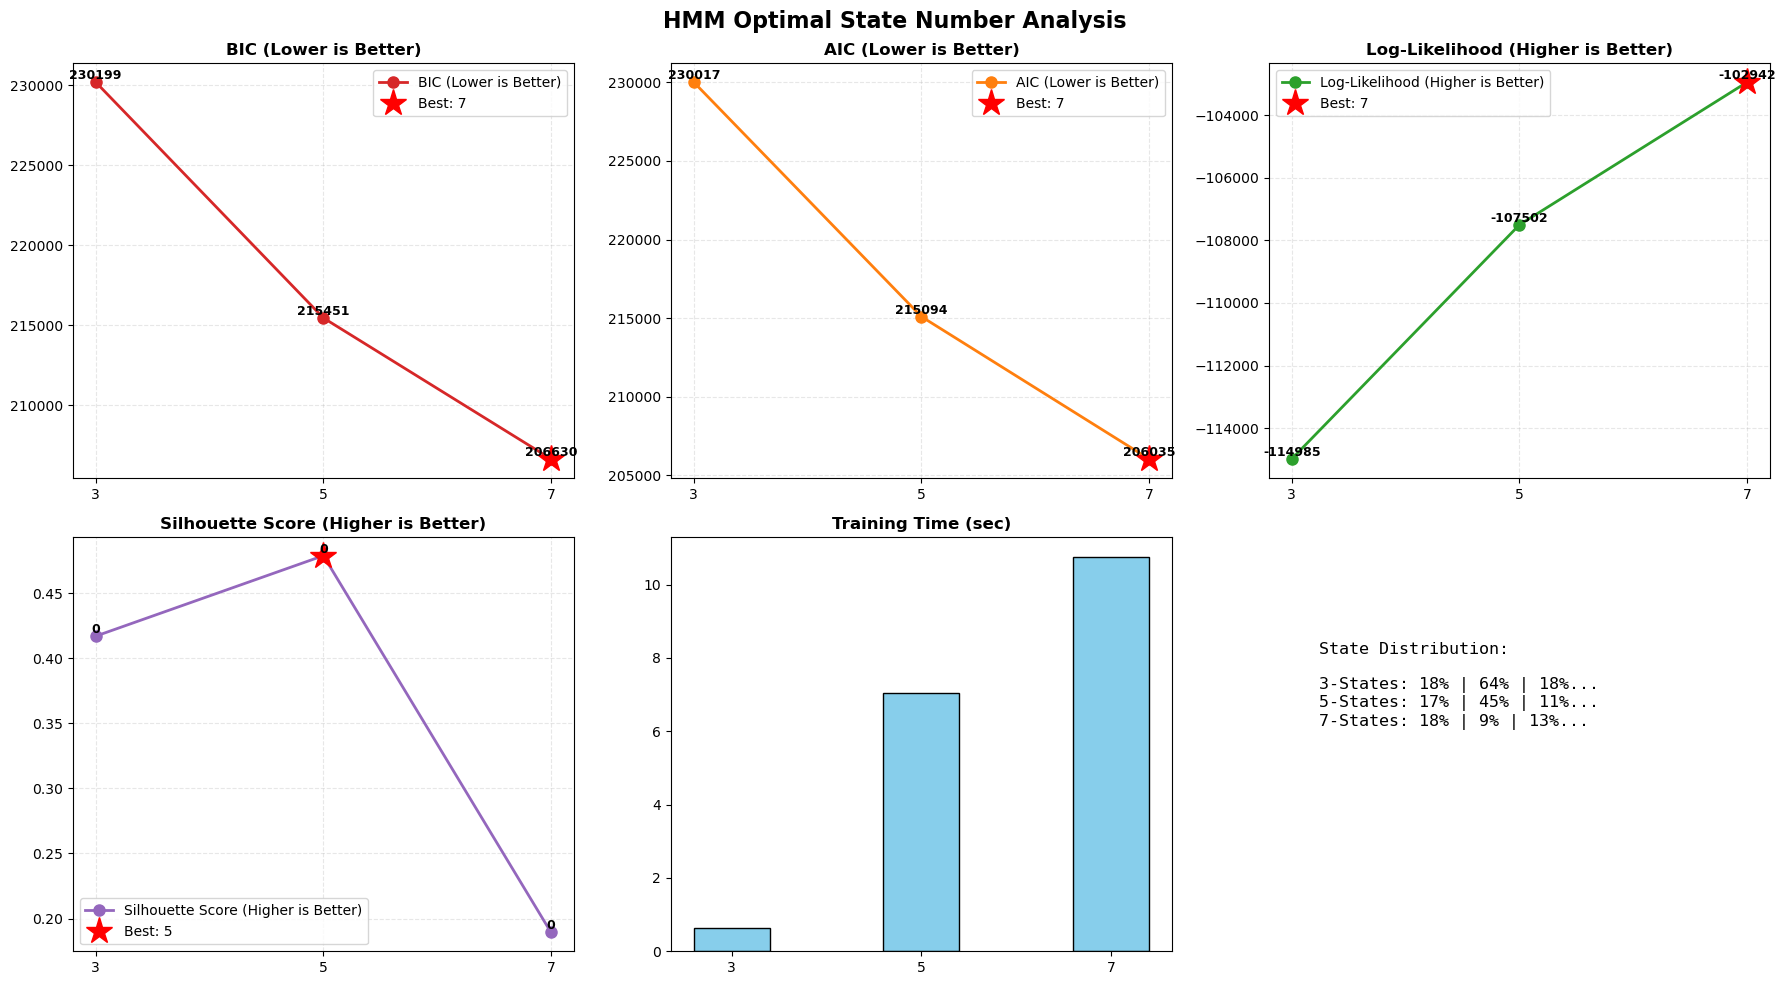


【4. 推薦結果】
🏆 BIC 建議 (考量複雜度): 7 狀態
🏆 Log-Likelihood 建議 (考量擬合度): 7 狀態
✨ 已保存最佳模型 (7 States) 至 output/hmm_best_model_7states.pkl


In [18]:
# ============================================================
# HMM 最优状态数对比分析 (3 vs 5 vs 7) - 最終修復版
# ============================================================
# 修復重點：
# 1. 移除過時函數 `_get_n_fit_scalars`。
# 2. 改用內建 `.aic(X)` 和 `.bic(X)` 方法。
# 3. 確保 `tied` 協方差模式下的排序邏輯正確。
# ============================================================

import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import polars as pl
from pathlib import Path
from tqdm import tqdm
from sklearn.metrics import silhouette_score
import warnings
import time
import traceback

warnings.filterwarnings('ignore')

# 讓 log 支援不換行參數
def log(msg, **kwargs): 
    print(msg, **kwargs)

log("=" * 80)
log("【HMM 最优状态数对比分析 (Fix: Version Compatibility)】")
log("=" * 80)

# ---------- 配置 ----------
TRAIN_FEATURES = [
    "Ret_t_scaled",
    "Ret_ma_5m_scaled",
    "Ret_lag1_scaled"
]

SORT_METRIC = "Ret_t_scaled"
COVARIANCE_TYPE = "tied" # 綁定協方差
N_ITER = 200
TOL = 1e-4
MIN_COVAR = 1e-3 # 防止矩陣奇異

STATES_TO_TEST = [3, 5, 7]

# ---------- 1. 读取数据 ----------
# 請根據您的環境修改路徑
feature_file = Path("./output/step3_features_with_pca.parquet") 
if not feature_file.exists():
    # 備用路徑
    feature_file = Path("./output_v全域版/step3_features_with_pca.parquet")

if not feature_file.exists():
    raise FileNotFoundError(f"找不到文件，請確認路徑: {feature_file}")

df_raw = pl.read_parquet(feature_file)

if "Date" in df_raw.columns and "Time" in df_raw.columns:
    df_raw = df_raw.sort(["Date", "Time"])

X_data = df_raw.select(TRAIN_FEATURES).to_numpy().astype(np.float64)
SORT_COL_IDX = TRAIN_FEATURES.index(SORT_METRIC)

log(f"✔ 样本数: {len(X_data):,}")
log(f"✔ 协方差类型: {COVARIANCE_TYPE}")

# ---------- 2. 训练多个 HMM 模型 ----------
log("\n【2. 训练多个 HMM 模型】\n")

results = {
    "n_states": [], "bic": [], "aic": [], "log_likelihood": [],
    "silhouette": [], "model": [], "predictions": [], "training_time": []
}

for n_states in STATES_TO_TEST:
    log(f"→ 正在训练 {n_states} 状态模型...", end=" ")
    
    try:
        start_time = time.time()
        
        # 训练模型
        hmm = GaussianHMM(
            n_components=n_states,
            covariance_type=COVARIANCE_TYPE,
            n_iter=N_ITER,
            tol=TOL,
            min_covar=MIN_COVAR,
            random_state=42,
            verbose=0
        )
        
        hmm.fit(X_data)
        training_time = time.time() - start_time
        
        # --- 狀態排序邏輯 ---
        # 1. 找出排序索引 (根據 Ret)
        means_target = hmm.means_[:, SORT_COL_IDX]
        sorted_indices = np.argsort(means_target)
        
        # 2. 應用排序 (Means, StartProb, TransMat)
        hmm.means_ = hmm.means_[sorted_indices]
        hmm.startprob_ = hmm.startprob_[sorted_indices]
        hmm.transmat_ = hmm.transmat_[sorted_indices, :][:, sorted_indices]
        
        # 3. Tied 模式下，協方差矩陣只有一個，不能排序！
        if COVARIANCE_TYPE != "tied":
            hmm.covars_ = hmm.covars_[sorted_indices]
        
        # 重新預測
        states = hmm.predict(X_data)
        
        # --- 計算指標 (修正部分) ---
        log_likelihood = hmm.score(X_data)
        
        # 直接呼叫內建方法計算 AIC/BIC，不手動計算參數
        try:
            aic = hmm.aic(X_data)
            bic = hmm.bic(X_data)
        except:
            # 如果版本真的太舊或太新不支援，則手動計算 (備用方案)
            n_features = X_data.shape[1]
            if COVARIANCE_TYPE == 'tied':
                # (N-1) + N*(N-1) + N*D + D*(D+1)/2
                n_params = (n_states - 1) + (n_states * (n_states - 1)) + \
                           (n_states * n_features) + (n_features * (n_features + 1) / 2)
            else: # full
                n_params = (n_states - 1) + (n_states * (n_states - 1)) + \
                           (n_states * n_features) + (n_states * n_features * (n_features + 1) / 2)
            
            aic = -2 * log_likelihood + 2 * n_params
            bic = -2 * log_likelihood + n_params * np.log(len(X_data))
        
        try:
            # 為了加速，Silhouette 只取樣 5000 點計算
            sample_idx = np.random.choice(len(X_data), min(5000, len(X_data)), replace=False)
            silhouette = silhouette_score(X_data[sample_idx], states[sample_idx])
        except:
            silhouette = np.nan
        
        # 保存結果
        results["n_states"].append(n_states)
        results["bic"].append(bic)
        results["aic"].append(aic)
        results["log_likelihood"].append(log_likelihood)
        results["silhouette"].append(silhouette)
        results["model"].append(hmm)
        results["predictions"].append(states)
        results["training_time"].append(training_time)
        
        log(f"✓ ({training_time:.2f}s)")
        log(f"   BIC:{bic:.0f} | AIC:{aic:.0f} | LL:{log_likelihood:.0f} | Sil:{silhouette:.3f}")
        
    except Exception as e:
        log(f"\n✗ 失败: {str(e)}")
        # traceback.print_exc() 
        continue

# ---------- 3. 生成对比图表 ----------
if len(results["n_states"]) == 0:
    log("\n⚠ 所有模型訓練失敗，無法繪圖。")
else:
    log("\n【3. 生成对比图表】\n")

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle("HMM Optimal State Number Analysis", fontsize=16, fontweight='bold')

    # 輔助繪圖函數
    def plot_metric(ax, x, y, title, color, best_type='min'):
        ax.plot(x, y, 'o-', linewidth=2, markersize=8, color=color, label=title)
        ax.set_title(title, fontweight='bold')
        ax.grid(alpha=0.3, linestyle='--')
        ax.set_xticks(x)
        
        if len(y) > 0:
            if best_type == 'min':
                best_idx = np.argmin(y)
            else:
                best_idx = np.argmax(y)
                
            best_x = x[best_idx]
            best_y = y[best_idx]
            ax.plot(best_x, best_y, 'r*', markersize=20, label=f'Best: {best_x}')
            ax.legend()
            
            # 標數值
            for i, val in enumerate(y):
                ax.text(x[i], val, f'{val:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

    # 1. BIC
    plot_metric(axes[0, 0], results["n_states"], results["bic"], "BIC (Lower is Better)", '#D62728', 'min')

    # 2. AIC
    plot_metric(axes[0, 1], results["n_states"], results["aic"], "AIC (Lower is Better)", '#FF7F0E', 'min')

    # 3. Log-Likelihood
    plot_metric(axes[0, 2], results["n_states"], results["log_likelihood"], "Log-Likelihood (Higher is Better)", '#2CA02C', 'max')

    # 4. Silhouette
    valid_indices = [i for i, v in enumerate(results["silhouette"]) if not np.isnan(v)]
    if valid_indices:
        sil_x = [results["n_states"][i] for i in valid_indices]
        sil_y = [results["silhouette"][i] for i in valid_indices]
        plot_metric(axes[1, 0], sil_x, sil_y, "Silhouette Score (Higher is Better)", '#9467BD', 'max')

    # 5. Training Time
    ax = axes[1, 1]
    ax.bar(results["n_states"], results["training_time"], color='skyblue', edgecolor='black')
    ax.set_title("Training Time (sec)", fontweight='bold')
    ax.set_xticks(results["n_states"])

    # 6. State Distribution Summary
    ax = axes[1, 2]
    ax.axis('off')
    summary_text = "State Distribution:\n\n"
    for i, n in enumerate(results["n_states"]):
        counts = np.bincount(results["predictions"][i], minlength=n)
        pcts = counts / counts.sum()
        summary_text += f"{n}-States: " + " | ".join([f"{p:.0%}" for p in pcts[:3]]) + "...\n"
    
    ax.text(0.1, 0.5, summary_text, fontsize=12, family='monospace')

    plt.tight_layout()
    # 請確保資料夾存在
    Path("./output").mkdir(exist_ok=True)
    plt.savefig("./output/hmm_optimal_comparison.png", dpi=300)
    plt.show()

    # ---------- 4. 推薦結果 ----------
    log("\n【4. 推薦結果】")
    
    best_bic = results["n_states"][np.argmin(results["bic"])]
    best_ll = results["n_states"][np.argmax(results["log_likelihood"])]
    
    log(f"🏆 BIC 建議 (考量複雜度): {best_bic} 狀態")
    log(f"🏆 Log-Likelihood 建議 (考量擬合度): {best_ll} 狀態")
    
    # 這裡我們優先選擇 BIC 最低的
    best_n = best_bic
    best_idx = np.argmin(results["bic"])
    
    # 如果 BIC 建議 3，但 5 的 LL 提升很多，可以考慮 5
    # 這裡簡單邏輯：從眾
    
    with open(f"./output/hmm_best_model_{best_n}states.pkl", "wb") as f:
        pickle.dump(results["model"][best_idx], f)
    
    log(f"✨ 已保存最佳模型 ({best_n} States) 至 output/hmm_best_model_{best_n}states.pkl")

## 觀察

In [ ]:
# ============================================================
# Cell 10: HMM 狀態互動式視覺化 (線圖 + MA + 按鈕翻頁)
# ============================================================
# 升級重點：
# 1. 視覺優化：改為連貫的 Line Chart。
# 2. 狀態呈現：價格線會根據 HMM 狀態變色 (紅/灰/綠)。
# 3. 技術指標：加入 MA5, MA10, MA30 趨勢線。
# 4. 操作優化：使用「上一天/下一天」按鈕取代下拉選單，檢視更流暢。
# ============================================================

import polars as pl
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output
from pathlib import Path

# 設定路徑 (請依據您的環境調整)
# OUT = Path("./output") 

def log(msg): print(msg)

log("=" * 60)
log("【步驟 10】HMM 狀態互動式回測圖 (線圖版)")
log("=" * 60)

# ---------- 1. 讀取與計算指標 ----------
log("處理資料與計算 MA...")
parquet_path = OUT / "step4_features_with_hmm.parquet"
if not parquet_path.exists():
    raise FileNotFoundError(f"找不到檔案: {parquet_path}")

# 讀取資料
df = pl.read_parquet(parquet_path)

# 確保必要欄位
if "Price" not in df.columns and "Close" in df.columns:
    df = df.rename({"Close": "Price"})

# 計算 MA (在 Polars 中計算效率較高)
# 注意：這裡假設資料已經按時間排序。如果是多商品資料需先 group_by。
df = df.sort("SnapshotTime")
df = df.with_columns([
    pl.col("Price").rolling_mean(window_size=5).alias("MA5"),
    pl.col("Price").rolling_mean(window_size=10).alias("MA10"),
    pl.col("Price").rolling_mean(window_size=30).alias("MA30")
])

# 增加日期欄位用於分頁
if "Date" not in df.columns:
    df = df.with_columns(pl.col("SnapshotTime").dt.date().cast(pl.Utf8).alias("Date"))

# 轉為 Pandas (Plotly 用)
df_plot = df.select(["Date", "SnapshotTime", "Price", "HMM_State_Final", "MA5", "MA10", "MA30"]).to_pandas()
df_plot["SnapshotTime"] = pd.to_datetime(df_plot["SnapshotTime"])

# 取得日期清單
date_list = sorted(df_plot["Date"].unique())
log(f"✔ 資料準備完成，共 {len(df_plot):,} 筆，{len(date_list)} 個交易日")

# ---------- 2. 互動介面狀態管理 ----------

class ChartManager:
    def __init__(self, dates, df):
        self.dates = dates
        self.df = df
        self.current_idx = len(dates) - 1 # 預設顯示最後一天
        self.out = widgets.Output() # 用於顯示圖表
        
        # 按鈕與標籤
        self.btn_prev = widgets.Button(description="< Prev Day", icon='arrow-left')
        self.btn_next = widgets.Button(description="Next Day >", icon='arrow-right')
        self.label_date = widgets.Label(value=f"Date: {dates[self.current_idx]}")
        
        # 綁定事件
        self.btn_prev.on_click(self.on_prev_click)
        self.btn_next.on_click(self.on_next_click)
        
        # 初始化顯示
        self.render()

    def on_prev_click(self, b):
        if self.current_idx > 0:
            self.current_idx -= 1
            self.render()

    def on_next_click(self, b):
        if self.current_idx < len(self.dates) - 1:
            self.current_idx += 1
            self.render()

    def get_segmented_price(self, df_day, target_state):
        """
        技巧：為了讓線圖在變色時不斷裂，我們需要讓線段「多延伸一點點」。
        如果 index i 是 State 0，我們希望線畫到 index i+1，
        這樣如果 i+1 是 State 2，紅線和綠線就會接在一起。
        """
        # 建立遮罩：當下是該狀態 OR 下一個時刻是該狀態 (為了連接縫隙)
        # 注意：這只是視覺上的平滑處理
        mask = (df_day['HMM_State_Final'] == target_state) | \
               (df_day['HMM_State_Final'].shift(-1) == target_state)
        
        # 將不符合的點設為 NaN，Plotly 會自動斷開不畫
        price_seg = df_day['Price'].copy()
        price_seg[~mask] = np.nan
        return price_seg

    def render(self):
        curr_date = self.dates[self.current_idx]
        self.label_date.value = f"📅 Date: {curr_date} ({self.current_idx + 1}/{len(self.dates)})"
        
        # 鎖定按鈕狀態
        self.btn_prev.disabled = (self.current_idx == 0)
        self.btn_next.disabled = (self.current_idx == len(self.dates) - 1)
        
        # 篩選當日資料
        mask = self.df["Date"] == curr_date
        df_day = self.df[mask].copy().reset_index(drop=True)
        
        if len(df_day) == 0:
            with self.out:
                clear_output(wait=True)
                print(f"No data for {curr_date}")
            return

        # --- 繪圖邏輯 ---
        fig = go.Figure()

        # 1. 繪製 MA (放在最底層)
        ma_colors = {'MA5': '#FFD700', 'MA10': '#1E90FF', 'MA30': '#9370DB'} # 金, 藍, 紫
        for ma, color in ma_colors.items():
            fig.add_trace(go.Scattergl(
                x=df_day['SnapshotTime'], y=df_day[ma],
                mode='lines',
                line=dict(color=color, width=1, dash='dot' if ma == 'MA30' else 'solid'),
                name=ma,
                hoverinfo='skip' # 減少干擾
            ))

        # 2. 繪製分段變色價格線
        # 我們畫三條線，分別代表三種狀態，利用 NaN 讓它們只在該出現的地方出現
        
        # State 0: Bear (Red)
        fig.add_trace(go.Scattergl(
            x=df_day['SnapshotTime'],
            y=self.get_segmented_price(df_day, 0),
            mode='lines',
            line=dict(color='#D62728', width=2), # 紅色
            name='Bear (跌)',
            connectgaps=False # 關鍵：不連接空值
        ))

        # State 1: Neutral (Grey)
        fig.add_trace(go.Scattergl(
            x=df_day['SnapshotTime'],
            y=self.get_segmented_price(df_day, 1),
            mode='lines',
            line=dict(color='#B0B0B0', width=2), # 灰色
            name='Neutral (盤)',
            connectgaps=False
        ))

        # State 2: Bull (Green)
        fig.add_trace(go.Scattergl(
            x=df_day['SnapshotTime'],
            y=self.get_segmented_price(df_day, 2),
            mode='lines',
            line=dict(color='#2CA02C', width=2), # 綠色
            name='Bull (漲)',
            connectgaps=False
        ))

        # 3. 版面設定
        fig.update_layout(
            title=f"HMM Price Action Analysis - {curr_date}",
            title_x=0.5,
            xaxis_title="Time",
            yaxis_title="Price",
            template="plotly_dark",
            height=600,
            hovermode="x unified",
            legend=dict(orientation="h", y=1.02, x=1, xanchor="right"),
            margin=dict(l=50, r=50, t=80, b=50)
        )
        
        # 顯示
        with self.out:
            clear_output(wait=True)
            fig.show()

# ---------- 3. 啟動介面 ----------

log("\n【互動式回測介面】")
# 建立實例
chart_app = ChartManager(date_list, df_plot)

# 顯示控制項與圖表
ui = widgets.VBox([
    widgets.HBox([chart_app.btn_prev, chart_app.label_date, chart_app.btn_next]),
    chart_app.out
])

display(ui)

【步驟 10】HMM 狀態互動式回測圖 (線圖版)
處理資料與計算 MA...
✔ 資料準備完成，共 20,606 筆，82 個交易日

【互動式回測介面】


In [12]:
# ============================================================
# Cell 10: HMM 狀態互動式視覺化 (彩色線圖 + MA + 按鈕翻頁)
# ============================================================
# 功能升級：
# 1. 視覺化：使用連續線圖 (Line Chart) 取代點圖。
# 2. 狀態著色：價格線顏色隨 HMM 狀態變化 (紅=跌, 綠=漲, 灰=盤)。
# 3. 技術指標：加入 MA5, MA10, MA30 作為趨勢參考。
# 4. 操作優化：使用 [上一天] / [下一天] 按鈕，方便連續檢視。
# ============================================================

import polars as pl
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output
from pathlib import Path

# 設定路徑 (請依據您的環境調整)
# OUT = Path("./output") 

def log(msg): print(msg)

log("=" * 60)
log("【步驟 10】HMM 狀態互動式回測圖 (線圖版)")
log("=" * 60)

# ---------- 1. 讀取與處理資料 ----------
log("正在讀取資料並計算均線...")
parquet_path = OUT / "step4_features_with_hmm.parquet"
if not parquet_path.exists():
    raise FileNotFoundError(f"找不到檔案: {parquet_path}，請確認 Step 8c 或 Step 9 已執行。")

# 讀取資料
df = pl.read_parquet(parquet_path)

# 確保必要欄位名稱統一
if "Price" not in df.columns and "Close" in df.columns:
    df = df.rename({"Close": "Price"})
if "SnapshotTime" not in df.columns and "Time" in df.columns:
    df = df.rename({"Time": "SnapshotTime"})

# 確保按時間排序 (計算 MA 才準確)
df = df.sort("SnapshotTime")

# 計算 MA (Moving Averages)
df = df.with_columns([
    pl.col("Price").rolling_mean(window_size=5).alias("MA5"),
    pl.col("Price").rolling_mean(window_size=10).alias("MA10"),
    pl.col("Price").rolling_mean(window_size=30).alias("MA30")
])

# 增加日期欄位 (用於分頁)
if "Date" not in df.columns:
    df = df.with_columns(pl.col("SnapshotTime").dt.date().cast(pl.Utf8).alias("Date"))

# 轉換為 Pandas 以利 Plotly 與 Widget 操作
df_plot = df.select(["Date", "SnapshotTime", "Price", "HMM_State_Final", "MA5", "MA10", "MA30"]).to_pandas()
df_plot["SnapshotTime"] = pd.to_datetime(df_plot["SnapshotTime"])

# 取得日期清單
date_list = sorted(df_plot["Date"].unique())
log(f"✔ 資料準備完成，共 {len(df_plot):,} 筆，涵蓋 {len(date_list)} 個交易日")

# ---------- 2. 定義互動圖表類別 ----------

class ChartManager:
    def __init__(self, dates, df):
        self.dates = dates
        self.df = df
        self.current_idx = len(dates) - 1 # 預設顯示最後一天
        
        # 建立 Widget 元件
        self.out = widgets.Output() # 圖表顯示區
        self.btn_prev = widgets.Button(description="< Prev Day", icon='arrow-left', layout=widgets.Layout(width='120px'))
        self.btn_next = widgets.Button(description="Next Day >", icon='arrow-right', layout=widgets.Layout(width='120px'))
        self.label_date = widgets.Label(value=f"Date: {dates[self.current_idx]}", layout=widgets.Layout(margin='5px 20px'))
        
        # 綁定按鈕事件
        self.btn_prev.on_click(self.on_prev_click)
        self.btn_next.on_click(self.on_next_click)
        
        # 初始渲染
        self.render()

    def on_prev_click(self, b):
        if self.current_idx > 0:
            self.current_idx -= 1
            self.render()

    def on_next_click(self, b):
        if self.current_idx < len(self.dates) - 1:
            self.current_idx += 1
            self.render()

    def get_segmented_price(self, df_day, target_state):
        """
        【關鍵技巧】解決線圖斷裂問題
        如果只畫 state==0 的點，線條會斷成一點一點的。
        我們必須把「狀態切換」的那一瞬間連起來。
        邏輯：若當前點是 target_state，或下一個點是 target_state，則保留該點價格。
        """
        # 建立遮罩：當下是該狀態 OR 下一個時刻是該狀態 (為了連接縫隙)
        mask = (df_day['HMM_State_Final'] == target_state) | \
               (df_day['HMM_State_Final'].shift(-1) == target_state)
        
        # 複製價格序列，不符合條件的設為 NaN (Plotly 會自動斷開 NaN)
        price_seg = df_day['Price'].copy()
        price_seg[~mask] = np.nan
        return price_seg

    def render(self):
        # 1. 準備當日資料
        curr_date = self.dates[self.current_idx]
        self.label_date.value = f"📅 Date: {curr_date} ({self.current_idx + 1}/{len(self.dates)})"
        
        # 控制按鈕可用性
        self.btn_prev.disabled = (self.current_idx == 0)
        self.btn_next.disabled = (self.current_idx == len(self.dates) - 1)
        
        # 篩選 Dataframe
        mask = self.df["Date"] == curr_date
        df_day = self.df[mask].copy().reset_index(drop=True)
        
        if len(df_day) == 0:
            with self.out:
                clear_output(wait=True)
                print(f"No data for {curr_date}")
            return

        # 2. 建立 Plotly 圖表
        fig = go.Figure()

        # (A) 繪製 MA 均線 (底層)
        # 顏色：MA5(金), MA10(藍), MA30(紫)
        ma_configs = [
            ('MA5', '#FFD700', 1, 'solid'),
            ('MA10', '#1E90FF', 1, 'solid'),
            ('MA30', '#9370DB', 1, 'dot')
        ]
        
        for name, color, width, dash in ma_configs:
            fig.add_trace(go.Scattergl(
                x=df_day['SnapshotTime'], y=df_day[name],
                mode='lines',
                line=dict(color=color, width=width, dash=dash),
                name=name,
                hoverinfo='skip' # MA 不顯示 hover 以免干擾
            ))

        # (B) 繪製分段變色價格線 (HMM 狀態)
        # 我們畫三條線，分別代表三種狀態，利用 NaN 技巧讓它們只在該出現的地方出現
        
        # State 0: Bear (紅色)
        fig.add_trace(go.Scattergl(
            x=df_day['SnapshotTime'],
            y=self.get_segmented_price(df_day, 0),
            mode='lines',
            line=dict(color='#D62728', width=2), 
            name='Bear (跌)',
            connectgaps=False # 關鍵：遇到 NaN 不連線
        ))

        # State 1: Neutral (灰色)
        fig.add_trace(go.Scattergl(
            x=df_day['SnapshotTime'],
            y=self.get_segmented_price(df_day, 1),
            mode='lines',
            line=dict(color='#B0B0B0', width=2), 
            name='Neutral (盤)',
            connectgaps=False
        ))

        # State 2: Bull (綠色)
        fig.add_trace(go.Scattergl(
            x=df_day['SnapshotTime'],
            y=self.get_segmented_price(df_day, 2),
            mode='lines',
            line=dict(color='#2CA02C', width=2), 
            name='Bull (漲)',
            connectgaps=False
        ))

        # 3. 版面美化
        fig.update_layout(
            title=f"HMM Price Action Analysis - {curr_date}",
            title_x=0.5,
            xaxis_title="Time",
            yaxis_title="Price",
            template="plotly_dark", # 專業暗色模式
            height=600,
            hovermode="x unified",  # 滑鼠移動時顯示 X 軸上所有數據
            legend=dict(
                orientation="h", 
                yanchor="bottom", 
                y=1.02, 
                xanchor="right", 
                x=1
            ),
            margin=dict(l=50, r=50, t=80, b=50)
        )
        
        # 4. 輸出顯示
        with self.out:
            clear_output(wait=True)
            fig.show()

# ---------- 3. 啟動介面 ----------

log("\n【啟動互動式回測介面】")
# 建立實例
chart_app = ChartManager(date_list, df_plot)

# 組合 UI (按鈕在上方，圖表在下方)
ui = widgets.VBox([
    widgets.HBox([chart_app.btn_prev, chart_app.label_date, chart_app.btn_next], 
                 layout=widgets.Layout(justify_content='center', margin='0 0 10px 0')),
    chart_app.out
])

display(ui)

【步驟 10】HMM 狀態互動式回測圖 (線圖版)
正在讀取資料並計算均線...
✔ 資料準備完成，共 20,606 筆，涵蓋 82 個交易日

【啟動互動式回測介面】


## 回測

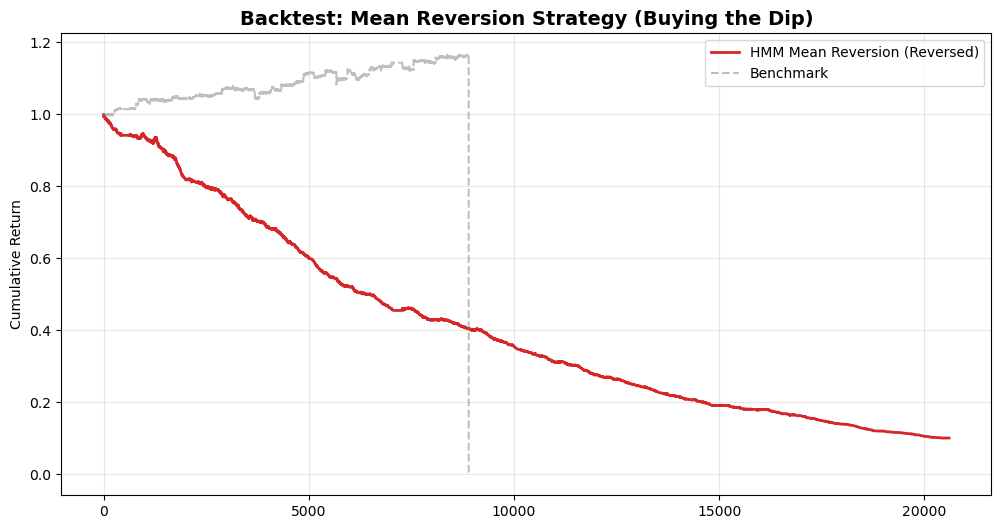

【逆勢策略績效】
總回報率: -89.93%
交易次數: 20573


In [10]:
# ============================================================
# Cell 11 (修正版): 策略反轉回測 (Mean Reversion Strategy)
# ============================================================

import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 設定路徑 (略)
# OUT = Path("./output") 

# 1. 讀取資料 (同上)
parquet_path = OUT / "step4_features_with_hmm.parquet"
df = pl.read_parquet(parquet_path).sort("SnapshotTime")

if "Price" in df.columns:
    df = df.with_columns([
        pl.col("Price").pct_change().shift(-1).alias("Ret_Next")
    ])
else:
    df = df.with_columns([
        pl.col("Ret_t_scaled").shift(-1).alias("Ret_Next")
    ])

df_test = df.select(["SnapshotTime", "HMM_State_Final", "Ret_Next"]).to_pandas().dropna()

# 2. 定義策略：逆勢操作 (Mean Reversion)
# 發現 State 0 (急跌) -> 預期反彈 -> 做多 (1)
# 發現 State 2 (急漲) -> 預期回檔 -> 放空 (-1)
# 發現 State 1 (盤整) -> 觀望 (0)

conditions = [
    (df_test["HMM_State_Final"] == 0), # Bear (超賣)
    (df_test["HMM_State_Final"] == 2), # Bull (超買)
    (df_test["HMM_State_Final"] == 1)  # Neutral
]

# 【關鍵修改】這裡反轉了方向
positions = [1, -1, 0] 

df_test["Position"] = np.select(conditions, positions, default=0)

# 交易成本 (假設單邊 0.03%)
df_test["Cost"] = df_test["Position"].diff().abs() * 0.0003 
df_test["Cost"] = df_test["Cost"].fillna(0)

# 計算損益
df_test["Strategy_Ret"] = (df_test["Position"] * df_test["Ret_Next"]) - df_test["Cost"]
df_test["BuyHold_Ret"] = df_test["Ret_Next"]

# 累計損益
df_test["Strategy_Cum"] = (1 + df_test["Strategy_Ret"]).cumprod()
df_test["BuyHold_Cum"] = (1 + df_test["BuyHold_Ret"]).cumprod()

# 繪圖
plt.figure(figsize=(12, 6))
plt.plot(df_test["Strategy_Cum"], label="HMM Mean Reversion (Reversed)", color="#D62728", linewidth=2)
plt.plot(df_test["BuyHold_Cum"], label="Benchmark", color="gray", alpha=0.5, linestyle="--")

plt.title("Backtest: Mean Reversion Strategy (Buying the Dip)", fontsize=14, fontweight='bold')
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 輸出統計
total_ret = df_test["Strategy_Cum"].iloc[-1] - 1
print(f"【逆勢策略績效】")
print(f"總回報率: {total_ret:.2%}")
print(f"交易次數: {len(df_test)}")